###  Analysis:Use Case: Fraud Detection
#### Problem Statement: Detect fraudulent transactions based on transaction details and customer information. The target variable is the 'is_fraud' column, which indicates whether a transaction is fraudulent or not.

## Import  library

In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## Read the files

### Read and convert the transaction file into CSV 

In [38]:
for num in range(132):
  transactionfiles= f'/Users/sarika/Desktop/DS_UTS/Machinelearning/Assignment_3/Group_assignment/final/transactions_{num}.csv'  #read and load into transactionfile

  change_to_csv = pd.read_csv(transactionfiles, delimiter='|') #read and convert into csv 
  print(f'{transactionfiles}')
  print(change_to_csv)

  transaction_csvfiles = f'/Users/sarika/Desktop/DS_UTS/Machinelearning/Assignment_3/Group_assignment/new_transactions_{num}.csv' 
  change_to_csv.to_csv(transaction_csvfiles, index=False)

/Users/sarika/Desktop/DS_UTS/Machinelearning/Assignment_3/Group_assignment/final/transactions_0.csv
                  cc_num      acct_num                         trans_num  \
0          4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1          4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2          4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3          4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4          4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                  ...           ...                               ...   
108123  3592927524372804  632265815336  b4f6bc50e8c25083554f7a6365fbd020   
108124  3592927524372804  632265815336  a2eb246a2082a232256fdb91a115f574   
108125  3592927524372804  632265815336  58f1916fef29a345f45d3f99728b8bea   
108126  3592927524372804  632265815336  974d131d9a8894661dfd6bd034aa6511   
108127  3592927524372804  632265815336  90f6b22704e30cc8cfb70681

### Merge the transaction files

In [39]:
import pandas as pd
import glob
import os

# specify the path to your files
path = "/Users/sarika/Desktop/DS_UTS/Machinelearning/Assignment_3/Group_assignment/*.csv"

# use glob to get a list of all csv files in the specified path
files = glob.glob(path)

# create an empty list to store the dataframes
df_list = []

# loop through each file and read it into a dataframe
for i in range(1, 132):
    file_name = os.path.join("/Users/sarika/Desktop/DS_UTS/Machinelearning/Assignment_3/Group_assignment/", f"new_transactions_{i}.csv")
    df = pd.read_csv(file_name)
    # do something with the dataframe
    df_list.append(df)

# concatenate all the dataframes into one
transactions_df = pd.concat(df_list, ignore_index=True)

# save the merged dataframe to a new csv file
transactions_df.to_csv("merged_transactions.csv", index=False)
transactions_df.head(5)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4065133387262473,950105810049,8bc87b4a938a94de66c73312a70b955e,1648587377,grocery_pos,43.25,0,"Olson, Montgomery and Vaughn",42.070264,-83.150048
1,4065133387262473,950105810049,a091d0441f62b8195a005b698a9b25d7,1651692302,misc_pos,98.94,0,Mills Ltd,43.586871,-83.310010
2,4065133387262473,950105810049,e458e6934892d3871fc49483f6744eab,1642543681,gas_transport,53.33,0,Reynolds-Gamble,42.564447,-83.768322
3,4065133387262473,950105810049,ec9286554b98b0f6272e7ad3e79ac46a,1650742723,misc_net,85.15,0,Rivera-Evans,43.403984,-82.304605
4,4065133387262473,950105810049,ff9109f3fcfc870213143c7cd55dee1c,1650746122,misc_net,61.35,0,Santiago Group,41.733693,-82.953968


### Read the customer data

In [40]:
Cus_df = pd.read_csv('/Users/sarika/Desktop/DS_UTS/Machinelearning/Assignment_3/Group_assignment/final/customers.csv',delimiter='|')
print(Cus_df)
Cus_df.to_csv('customers.csv',index=False)
customers_df = pd.read_csv('customers.csv')


             ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         3

## Clean both the files before merge

Explore the data set

In [41]:
transactions_df.shape
transactions_df.info()
transactions_df.head(5)
transactions_df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152776 entries, 0 to 4152775
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   acct_num    object 
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), object(7)
memory usage: 316.8+ MB


<bound method NDFrame.describe of                    cc_num      acct_num                         trans_num  \
0        4065133387262473  950105810049  8bc87b4a938a94de66c73312a70b955e   
1        4065133387262473  950105810049  a091d0441f62b8195a005b698a9b25d7   
2        4065133387262473  950105810049  e458e6934892d3871fc49483f6744eab   
3        4065133387262473  950105810049  ec9286554b98b0f6272e7ad3e79ac46a   
4        4065133387262473  950105810049  ff9109f3fcfc870213143c7cd55dee1c   
...                   ...           ...                               ...   
4152771  2704390552958068  756767582811  1f091e64bd3f2382b3a4f90889329c32   
4152772  2704390552958068  756767582811  971aa63530f8f8fb1de28472e6aa53bc   
4152773  2704390552958068  756767582811  555941e364d1f591a6ae4088557f8ed3   
4152774  2704390552958068  756767582811  b756330bb5da439e28412f40e7a5f9e3   
4152775  2704390552958068  756767582811  d8b2caf59c06c36fea6980964f0a1fd6   

          unix_time        category    am

In [42]:
customers_df.shape
customers_df.info()
customers_df.head(5)
customers_df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


<bound method NDFrame.describe of              ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler   

### Lets convert  the 'unix_time' column in the 'transactions_df' DataFrame to a datetime format and storing it in a new column called 'date'.as we have already added the date in the dataset, we can remove unix_time


In [43]:
transactions_df['date'] = pd.to_datetime(transactions_df['unix_time'].values, unit='s')

In [44]:

transactions_df.drop(columns=['unix_time'], inplace=True)

###  calculate the age of each customer based on their date of birth (dob) and storing it in a new column called 'age' in the 'customers_df' DataFrame.# as we have already calculated the age we can remove dob column

In [45]:
customers_df['age'] = 2023 - pd.to_datetime(customers_df['dob']).dt.year

In [46]:
# as we have already calculated the age we can remove dob column
customers_df.drop(columns=['dob'], inplace=True)

### Validate null and missing data from transaction and cutomer file

In [47]:
#count and remove null or missing data  from transactions files
na_count_tran = transactions_df.isna().sum()
#print the number of NA
print(na_count_tran)


cc_num        0
acct_num      0
trans_num     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
date          0
dtype: int64


In [48]:
#count and remove null or missing data  from customer files
na_count_cus = customers_df.isna().sum()
#print the number of NA
print(na_count_cus)


ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
acct_num    0
age         0
dtype: int64


### Validate duplicate data in transaction and customer file

In [49]:
#count and remove duplicates from transaction files
du_count_tran = transactions_df.duplicated().sum()
# Print the number of duplicates
print(du_count_tran)

0


In [50]:
#count and remove duplicates from customer files
du_count_cus = customers_df.duplicated().sum()
# Print the number of duplicates
print(du_count_cus)

0


In [51]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152776 entries, 0 to 4152775
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   cc_num      object        
 1   acct_num    object        
 2   trans_num   object        
 3   category    object        
 4   amt         float64       
 5   is_fraud    object        
 6   merchant    object        
 7   merch_lat   float64       
 8   merch_long  float64       
 9   date        datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 316.8+ MB


In [52]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  acct_num  1000 non-null   int64  
 14  age       1000 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 113.4+ KB


## Merge Both the CSV

In [53]:
#merge Both the CSV
merged_df = pd.merge(transactions_df, customers_df)
print(merged_df.columns)
merged_df.to_csv('merged_df.csv', index=False)



Index(['cc_num', 'acct_num', 'trans_num', 'category', 'amt', 'is_fraud',
       'merchant', 'merch_lat', 'merch_long', 'date', 'ssn', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'age'],
      dtype='object')


## Analyse and clean the merged file

In [54]:
#count and remove duplicates from customer files
du_count_merged = merged_df.duplicated().sum()
# Print the number of duplicates
print(du_count_merged)


0


In [55]:
merged_df.isna().sum()

cc_num        0
acct_num      0
trans_num     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
date          0
ssn           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
age           0
dtype: int64

In [56]:
#count and remove null or missing data  from customer files
na_count_merged = merged_df.isna().sum()
#print the number of NA
print(na_count_merged)

cc_num        0
acct_num      0
trans_num     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
date          0
ssn           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
age           0
dtype: int64


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152776 entries, 0 to 4152775
Data columns (total 23 columns):
 #   Column      Dtype         
---  ------      -----         
 0   cc_num      object        
 1   acct_num    object        
 2   trans_num   object        
 3   category    object        
 4   amt         float64       
 5   is_fraud    object        
 6   merchant    object        
 7   merch_lat   float64       
 8   merch_long  float64       
 9   date        datetime64[ns]
 10  ssn         object        
 11  first       object        
 12  last        object        
 13  gender      object        
 14  street      object        
 15  city        object        
 16  state       object        
 17  zip         int64         
 18  lat         float64       
 19  long        float64       
 20  city_pop    int64         
 21  job         object        
 22  age         int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(14)
memory usage: 712

In [58]:
merged_df.columns

Index(['cc_num', 'acct_num', 'trans_num', 'category', 'amt', 'is_fraud',
       'merchant', 'merch_lat', 'merch_long', 'date', 'ssn', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'age'],
      dtype='object')

In [59]:
merged_df.head()

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,date,...,gender,street,city,state,zip,lat,long,city_pop,job,age
0,4065133387262473,950105810049,8bc87b4a938a94de66c73312a70b955e,grocery_pos,43.25,0,"Olson, Montgomery and Vaughn",42.070264,-83.150048,2022-03-29 20:56:17,...,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
1,4065133387262473,950105810049,a091d0441f62b8195a005b698a9b25d7,misc_pos,98.94,0,Mills Ltd,43.586871,-83.310010,2022-05-04 19:25:02,...,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
2,4065133387262473,950105810049,e458e6934892d3871fc49483f6744eab,gas_transport,53.33,0,Reynolds-Gamble,42.564447,-83.768322,2022-01-18 22:08:01,...,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
3,4065133387262473,950105810049,ec9286554b98b0f6272e7ad3e79ac46a,misc_net,85.15,0,Rivera-Evans,43.403984,-82.304605,2022-04-23 19:38:43,...,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
4,4065133387262473,950105810049,ff9109f3fcfc870213143c7cd55dee1c,misc_net,61.35,0,Santiago Group,41.733693,-82.953968,2022-04-23 20:35:22,...,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50


In [60]:
merged_df.tail()

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,date,...,gender,street,city,state,zip,lat,long,city_pop,job,age
4152771,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500,2022-09-06 02:24:36,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,65
4152772,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834,2022-10-15 09:34:44,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,65
4152773,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700,2022-09-04 12:00:53,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,65
4152774,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976,2022-12-09 04:53:44,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,65
4152775,2704390552958068,756767582811,d8b2caf59c06c36fea6980964f0a1fd6,travel,12.74,0,Cruz-Johnson,34.012253,-116.333944,2022-12-24 04:33:01,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,65


In [61]:
transactions_df.shape

(4152776, 10)

In [62]:
customers_df.shape

(1000, 15)

In [63]:
merged_df.shape

(4152776, 23)

In [64]:
merged_df.describe()

,amt,merch_lat,merch_long,date,zip,lat,long,city_pop,age
count,4.152776e+06,4.152776e+06,4.152776e+06,4152776,4.152776e+06,4.152776e+06,4.152776e+06,4.152776e+06,4.152776e+06
mean,6.907827e+01,3.735425e+01,-9.255236e+01,2021-05-08 07:34:58.221493248,5.203232e+04,3.735421e+01,-9.255222e+01,3.039805e+05,4.499962e+01
min,1.000000e+00,1.859001e+01,-1.603677e+02,2018-12-31 13:00:19,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.600000e+01
25%,9.110000e+00,3.373336e+01,-9.936152e+01,2020-04-24 18:11:09.750000128,2.737100e+04,3.378770e+01,-9.925060e+01,2.011200e+04,3.100000e+01
50%,4.441000e+01,3.818359e+01,-8.734306e+01,2021-07-21 06:24:46.500000,4.930100e+04,3.824200e+01,-8.762230e+01,6.759300e+04,4.200000e+01
75%,8.149000e+01,4.119202e+01,-7.964182e+01,2022-06-12 08:13:10.249999872,7.874500e+04,4.092180e+01,-7.990930e+01,2.398790e+05,5.500000e+01
max,4.130053e+04,6.577385e+01,-6.724632e+01,2022-12-31 12:59:42,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,9.600000e+01
std,1.618597e+02,5.469669e+00,1.746630e+01,NaN,3.004370e+04,5.439069e+00,1.745641e+01,5.706895e+05,1.750196e+01


## Perform feature engineering 

In [65]:
pd.value_counts(merged_df['category'])

category
shopping_pos      409327
home              392105
grocery_pos       390248
kids_pets         361099
gas_transport     354525
food_dining       312361
entertainment     304258
shopping_net      301592
personal_care     291915
misc_pos          274804
health_fitness    260233
misc_net          187741
grocery_net       179817
travel            132751
Name: count, dtype: int64

In [66]:
pd.value_counts(merged_df['is_fraud'])

is_fraud
0    4147871
1       4905
Name: count, dtype: int64

In [67]:

merged_df.nunique()



cc_num            976
acct_num          976
trans_num     4152776
category           14
amt             80523
is_fraud            2
merchant        21977
merch_lat     3680633
merch_long    3935361
date          4012871
ssn               976
first             364
last              478
gender              2
street            976
city              721
state              51
zip               932
lat               931
long              930
city_pop          759
job               502
age                80
dtype: int64

In [68]:
merged_df[merged_df.duplicated()]

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,date,...,gender,street,city,state,zip,lat,long,city_pop,job,age


## we have unique transaction hence we do not have any duplicates in merged_df

In [69]:
#copy dataframe and drop irrelevant column
df_final= merged_df.copy()

In [70]:
df_final = df_final.drop(['ssn', 'cc_num', 'first', 'last', 'acct_num', 'trans_num'], axis=1)

In [71]:
df_final.head(5)

,category,amt,is_fraud,merchant,merch_lat,merch_long,date,gender,street,city,state,zip,lat,long,city_pop,job,age
0,grocery_pos,43.25,0,"Olson, Montgomery and Vaughn",42.070264,-83.150048,2022-03-29 20:56:17,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
1,misc_pos,98.94,0,Mills Ltd,43.586871,-83.310010,2022-05-04 19:25:02,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
2,gas_transport,53.33,0,Reynolds-Gamble,42.564447,-83.768322,2022-01-18 22:08:01,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
3,misc_net,85.15,0,Rivera-Evans,43.403984,-82.304605,2022-04-23 19:38:43,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50
4,misc_net,61.35,0,Santiago Group,41.733693,-82.953968,2022-04-23 20:35:22,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,50


In [72]:
df_final.isna().sum()

category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
date          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
age           0
dtype: int64

In [73]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152776 entries, 0 to 4152775
Data columns (total 17 columns):
 #   Column      Dtype         
---  ------      -----         
 0   category    object        
 1   amt         float64       
 2   is_fraud    object        
 3   merchant    object        
 4   merch_lat   float64       
 5   merch_long  float64       
 6   date        datetime64[ns]
 7   gender      object        
 8   street      object        
 9   city        object        
 10  state       object        
 11  zip         int64         
 12  lat         float64       
 13  long        float64       
 14  city_pop    int64         
 15  job         object        
 16  age         int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(8)
memory usage: 522.8+ MB


In [74]:
df_final.describe()

,amt,merch_lat,merch_long,date,zip,lat,long,city_pop,age
count,4.152776e+06,4.152776e+06,4.152776e+06,4152776,4.152776e+06,4.152776e+06,4.152776e+06,4.152776e+06,4.152776e+06
mean,6.907827e+01,3.735425e+01,-9.255236e+01,2021-05-08 07:34:58.221493248,5.203232e+04,3.735421e+01,-9.255222e+01,3.039805e+05,4.499962e+01
min,1.000000e+00,1.859001e+01,-1.603677e+02,2018-12-31 13:00:19,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.600000e+01
25%,9.110000e+00,3.373336e+01,-9.936152e+01,2020-04-24 18:11:09.750000128,2.737100e+04,3.378770e+01,-9.925060e+01,2.011200e+04,3.100000e+01
50%,4.441000e+01,3.818359e+01,-8.734306e+01,2021-07-21 06:24:46.500000,4.930100e+04,3.824200e+01,-8.762230e+01,6.759300e+04,4.200000e+01
75%,8.149000e+01,4.119202e+01,-7.964182e+01,2022-06-12 08:13:10.249999872,7.874500e+04,4.092180e+01,-7.990930e+01,2.398790e+05,5.500000e+01
max,4.130053e+04,6.577385e+01,-6.724632e+01,2022-12-31 12:59:42,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,9.600000e+01
std,1.618597e+02,5.469669e+00,1.746630e+01,NaN,3.004370e+04,5.439069e+00,1.745641e+01,5.706895e+05,1.750196e+01


In [75]:
df_final.shape

(4152776, 17)

In [76]:
pd.value_counts(df_final['is_fraud'], normalize=True)

is_fraud
0    0.998819
1    0.001181
Name: proportion, dtype: float64

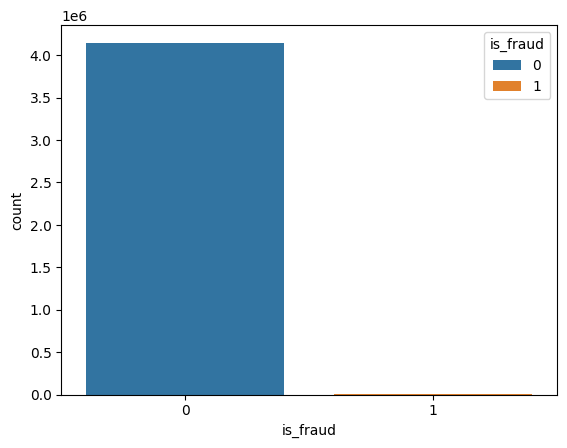

In [77]:
def plot_count(df_final, col, hue):
    graph = sns.countplot(data=df_final, x=df_final[col], hue=hue)
    plt.show()

plot_count(df_final, "is_fraud", hue='is_fraud')

### In our dataset, almost 99.88% of transactions are labeled as non-fraudulent. This high imbalance means that a model predicting all transactions as non-fraudulent would achieve an accuracy of 99.88%. However, using accuracy alone as a performance metric may be misleading due to this imbalance. Therefore, it's essential to explore alternative evaluation metrics like precision, recall, F1-score, and AUC-ROC, which provide a more refined assessment of the model's effectiveness in detecting fraudulent transactions.

In [78]:
#split train and test 
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_final, test_size=0.25, stratify=df_final['is_fraud'], shuffle=True, random_state=40)

In [79]:
pd.value_counts(df_train['is_fraud'])

is_fraud
0    3110903
1       3679
Name: count, dtype: int64

In [80]:
pd.value_counts(df_test['is_fraud'])

is_fraud
0    1036968
1       1226
Name: count, dtype: int64

### The percentages of non-fraudulent and fraudulent transactions in both the training and testing sets are approximately the same (99.88% non-fraudulent and 0.12% fraudulent), which is expected since you used stratified sampling. The split percentages are very close to the intended 75% for training and 25% for testing, with only minor deviations due to rounding and the integer nature of the dataset sizes.
### Training set: approximately 75% of the original dataset 
### Testing set: approximately 25% of the original dataset 

In [81]:
df_train.describe()

,amt,merch_lat,merch_long,date,zip,lat,long,city_pop,age
count,3.114582e+06,3.114582e+06,3.114582e+06,3114582,3.114582e+06,3.114582e+06,3.114582e+06,3.114582e+06,3.114582e+06
mean,6.907269e+01,3.735363e+01,-9.256200e+01,2021-05-08 09:43:22.104037376,5.204472e+04,3.735338e+01,-9.256191e+01,3.040441e+05,4.499741e+01
min,1.000000e+00,1.859001e+01,-1.603677e+02,2018-12-31 13:00:19,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.600000e+01
25%,9.110000e+00,3.373322e+01,-9.938489e+01,2020-04-25 02:08:27,2.737100e+04,3.378770e+01,-9.925060e+01,2.011200e+04,3.100000e+01
50%,4.442000e+01,3.818026e+01,-8.734750e+01,2021-07-21 07:03:59.500000,4.930100e+04,3.824200e+01,-8.762230e+01,6.759300e+04,4.200000e+01
75%,8.149000e+01,4.119252e+01,-7.964297e+01,2022-06-12 08:47:54.249999872,7.874500e+04,4.092180e+01,-7.990930e+01,2.398790e+05,5.500000e+01
max,4.130053e+04,6.577385e+01,-6.724632e+01,2022-12-31 12:59:36,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,9.600000e+01
std,1.615606e+02,5.472477e+00,1.747416e+01,NaN,3.004719e+04,5.441914e+00,1.746406e+01,5.706904e+05,1.749717e+01


In [82]:
df_train.head(5)

,category,amt,is_fraud,merchant,merch_lat,merch_long,date,gender,street,city,state,zip,lat,long,city_pop,job,age
3240727,misc_net,6.31,0,Brewer-Rivera,34.440281,-116.712055,2019-12-27 00:15:57,F,02499 Gonzales Mountain,Upland,CA,91784,34.1410,-117.6581,77103,Industrial buyer,51
3728492,health_fitness,9.60,0,Sexton-Young,20.798737,-158.036526,2021-09-22 12:49:52,F,06445 Pearson Junction Apt. 311,Kahuku,HI,96731,21.6750,-157.9725,3292,Counselling psychologist,86
3562956,shopping_pos,1.35,0,Gutierrez and Sons,28.125597,-82.409889,2022-07-24 10:59:30,F,95366 Chad Lake,Tampa,FL,33613,28.0772,-82.4455,717255,"Engineer, chemical",28
214319,kids_pets,92.84,0,May-Rogers,40.081493,-85.861441,2022-06-15 13:48:35,F,848 Dean Divide,Ellettsville,IN,47429,39.2545,-86.6196,7986,Adult nurse,26
2928596,grocery_pos,149.95,0,Huynh-Martinez,34.661530,-91.632171,2019-11-16 03:38:37,M,47851 Davis Lodge,Clinton,AR,72031,35.6045,-92.4758,7683,Government social research officer,22


#### Lets perform some visiualisation before we start model to Understand data distribution,Identify relationships,Detect anomalies


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
def plot_histogram(df_final, col, target):
    plot = sns.histplot(data = df_final, x = col, kde = True, hue = target)
    plot.set(xlabel = col, title = "Histogram plot for: " + col)
    plt.show()

def plot_countplot(df_final, col, target):
    plot = sns.countplot(data=df_final, x=col, hue=target)
    plot.set(xlabel = col, title = "Count plot for: " + col)
    plt.show()

def plot_box_plot(df_final, col):
    plot = sns.boxplot(data=df_final, x = col)
    plot.set(xlabel = col, title = "Box plot for: " + col)
    plt.show()


### Fraudulent activities according to amount

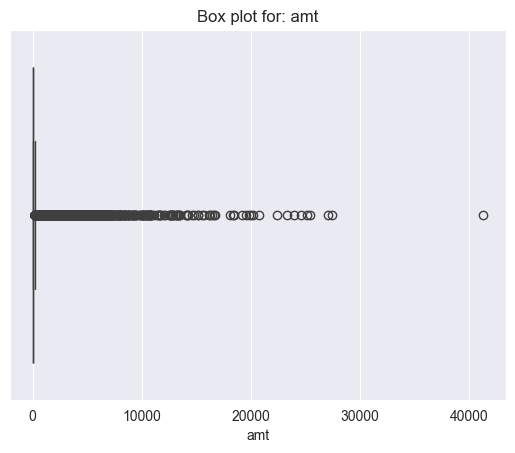

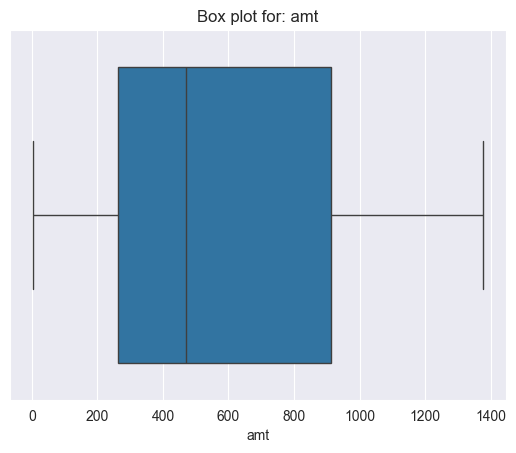

In [84]:
positive_class = df_train['is_fraud']==1
negative_class = df_train['is_fraud']==0

plot_box_plot(df_train[negative_class], 'amt')
plot_box_plot(df_train[positive_class], 'amt')


### Observation:
#### From the box plot we can see that the variance of amount is high. The system looks secured for high transaction.However, from the second plot it can be seen that the fraudulent activities is below 1400 dollars and mostly between 200 to 950 dollars.We should look closer to these amounts for detecting more fraud cases.

### Plot the graph fraud done as per gender

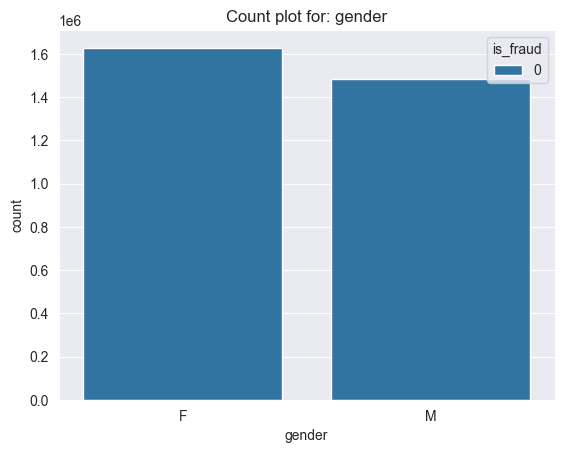

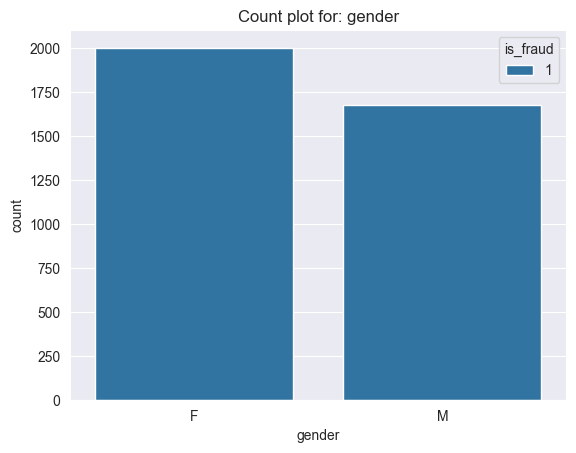

In [85]:
plot_countplot(df_train[negative_class], 'gender', target='is_fraud')
plot_countplot(df_train[positive_class], 'gender', target='is_fraud')

#### Observation:
##### Both gender seem to have similar fraudulent activities.

### Plot the graph fraud done as per age 

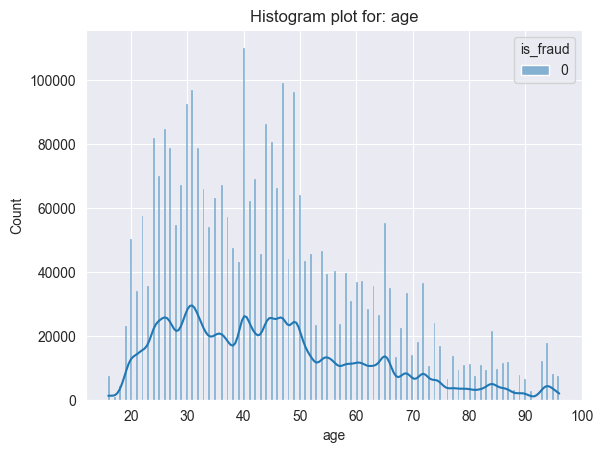

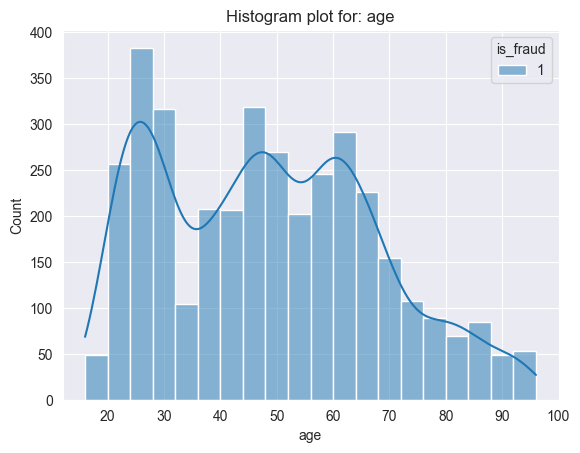

In [86]:
plot_histogram(df_train[negative_class], 'age', 'is_fraud')
plot_histogram(df_train[positive_class], 'age', 'is_fraud')

#### Observation:
##### Most people from age 25 to 60 tend to have fraudulent activities

#### Breaking down the age in different basket to plot as per age

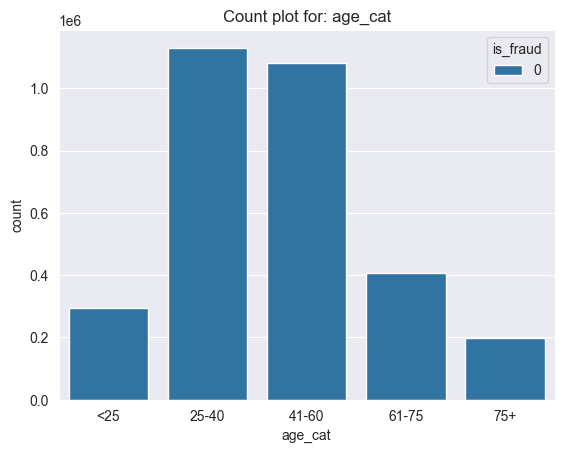

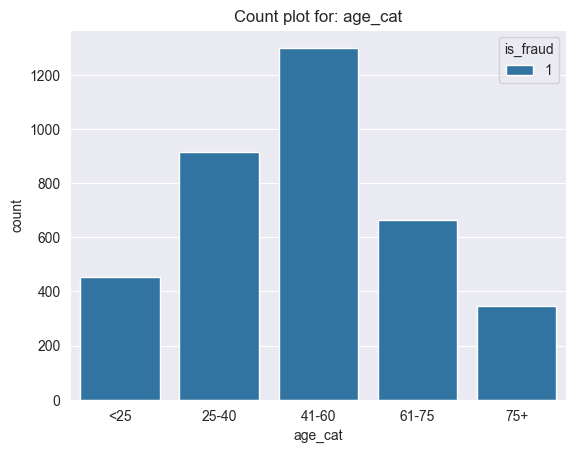

In [87]:
df_train['age_cat'] = pd.cut(df_train['age'], bins = [-1,24, 40, 60, 75, 200], labels = ['<25', '25-40', '41-60', '61-75','75+'])

plot_countplot(df_train[negative_class], 'age_cat', 'is_fraud')

plot_countplot(df_train[positive_class], 'age_cat', 'is_fraud')

#### Observation
##### Breaking down to categories we can see from 25-60 years of age people do more transactions and 41-60 years of people are more likely to be involved in fraudulent activity.

##### Plot the graph fraud done as per date(year,month,age)

#### First we extract the year,day and hours from the date  column and create new column for more specific nature

In [88]:
df_train['date_year'] = pd.to_datetime(df_train['date']).dt.year
df_train['date_day'] = pd.to_datetime(df_train['date']).dt.day_name()
df_train['date_hour'] = pd.to_datetime(df_train['date']).dt.hour
df_train.head(5)

,category,amt,is_fraud,merchant,merch_lat,merch_long,date,gender,street,city,...,zip,lat,long,city_pop,job,age,age_cat,date_year,date_day,date_hour
3240727,misc_net,6.31,0,Brewer-Rivera,34.440281,-116.712055,2019-12-27 00:15:57,F,02499 Gonzales Mountain,Upland,...,91784,34.1410,-117.6581,77103,Industrial buyer,51,41-60,2019,Friday,0
3728492,health_fitness,9.60,0,Sexton-Young,20.798737,-158.036526,2021-09-22 12:49:52,F,06445 Pearson Junction Apt. 311,Kahuku,...,96731,21.6750,-157.9725,3292,Counselling psychologist,86,75+,2021,Wednesday,12
3562956,shopping_pos,1.35,0,Gutierrez and Sons,28.125597,-82.409889,2022-07-24 10:59:30,F,95366 Chad Lake,Tampa,...,33613,28.0772,-82.4455,717255,"Engineer, chemical",28,25-40,2022,Sunday,10
214319,kids_pets,92.84,0,May-Rogers,40.081493,-85.861441,2022-06-15 13:48:35,F,848 Dean Divide,Ellettsville,...,47429,39.2545,-86.6196,7986,Adult nurse,26,25-40,2022,Wednesday,13
2928596,grocery_pos,149.95,0,Huynh-Martinez,34.661530,-91.632171,2019-11-16 03:38:37,M,47851 Davis Lodge,Clinton,...,72031,35.6045,-92.4758,7683,Government social research officer,22,<25,2019,Saturday,3


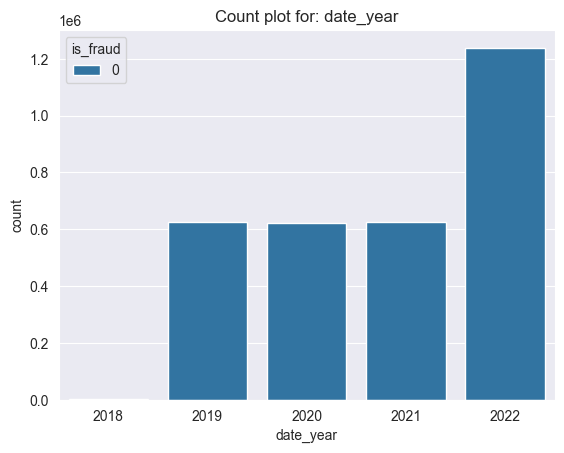

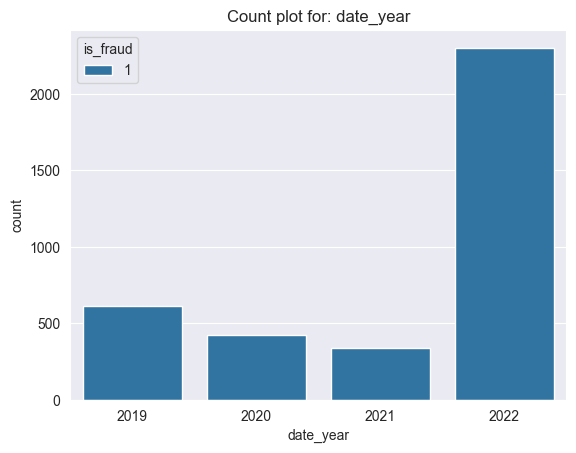

In [89]:
# plot as per the year 
plot_countplot(df_train[negative_class], 'date_year', 'is_fraud')
plot_countplot(df_train[positive_class], 'date_year', 'is_fraud')

#### Observation
##### Although 2019-2021 had similar transactions, the fraudulent activities were decreasing from 2019 to 2021.2022 had the highest transaction and also involved in most fraudulent cases.

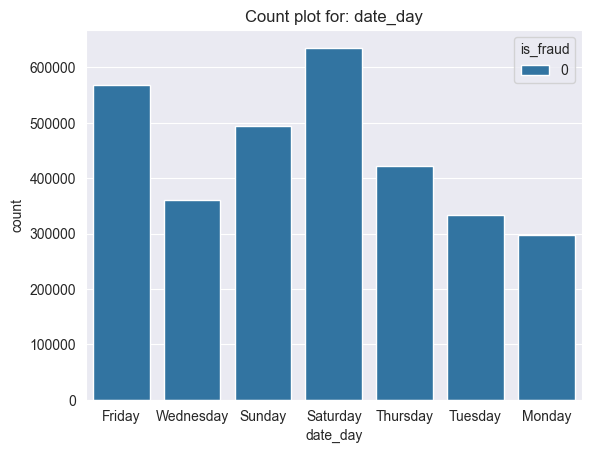

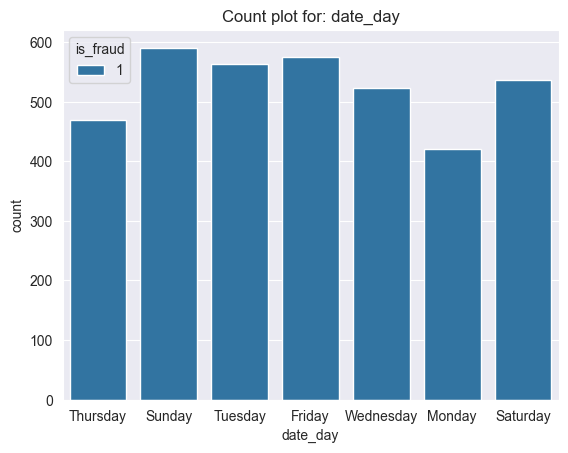

In [90]:
#Plot as per day 
plot_countplot(df_train[negative_class], 'date_day', 'is_fraud')
plot_countplot(df_train[positive_class], 'date_day', 'is_fraud')

#### Observation 
##### More fraudulant activity happens on friday follwed with sunday

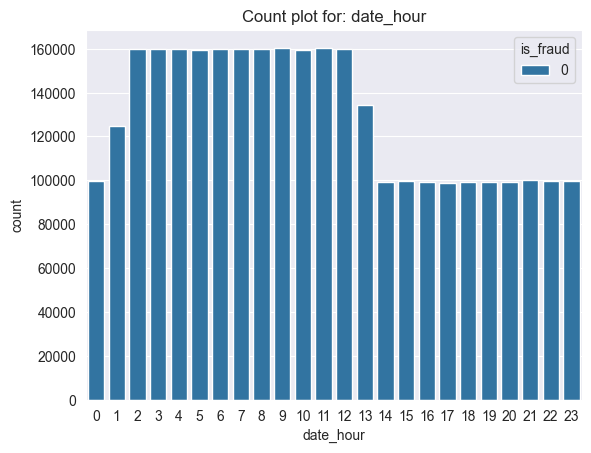

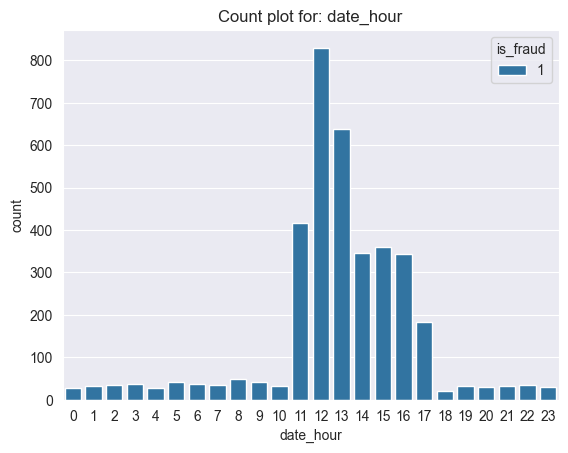

In [91]:
#plot as per the hour
plot_countplot(df_train[negative_class], 'date_hour', 'is_fraud')
plot_countplot(df_train[positive_class], 'date_hour', 'is_fraud')

#### Observation
##### Most of the transaction that shows highly fraudulent behaviour is between 11 A.M to 5 P.M. Most fraudulent activities has been occured at 12 P.M.

#### plot the graph fraud done as per category

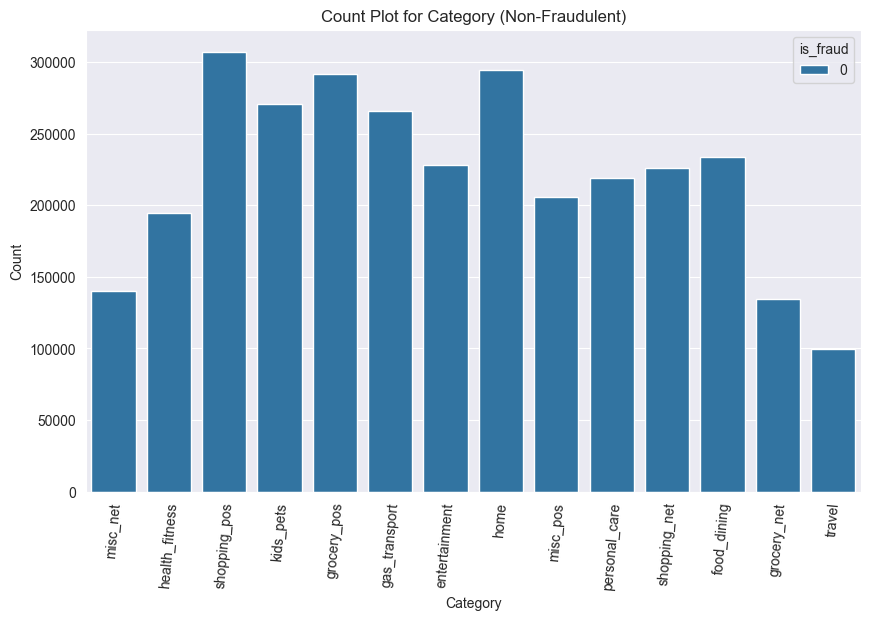

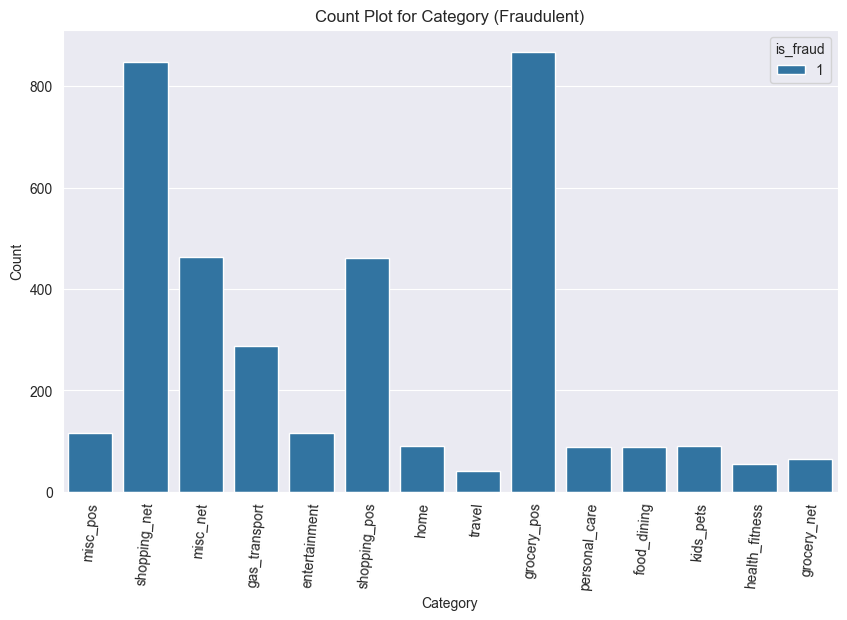

In [92]:
# Plot countplot as per the job (category)
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plot = sns.countplot(data=df_train[negative_class], x='category', hue='is_fraud')
plot.set(xlabel='Category', ylabel='Count', title='Count Plot for Category (Non-Fraudulent)')
plt.xticks(rotation=85)  # Rotate x-axis labels
plt.show()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plot = sns.countplot(data=df_train[positive_class], x='category', hue='is_fraud')
plot.set(xlabel='Category', ylabel='Count', title='Count Plot for Category (Fraudulent)')
plt.xticks(rotation=85)  # Rotate x-axis labels
plt.show()


#### Observation
##### Most of the fraudulent happen in grocery_pop and Shopping_pops category

#### Plot the graph fraud done as per state

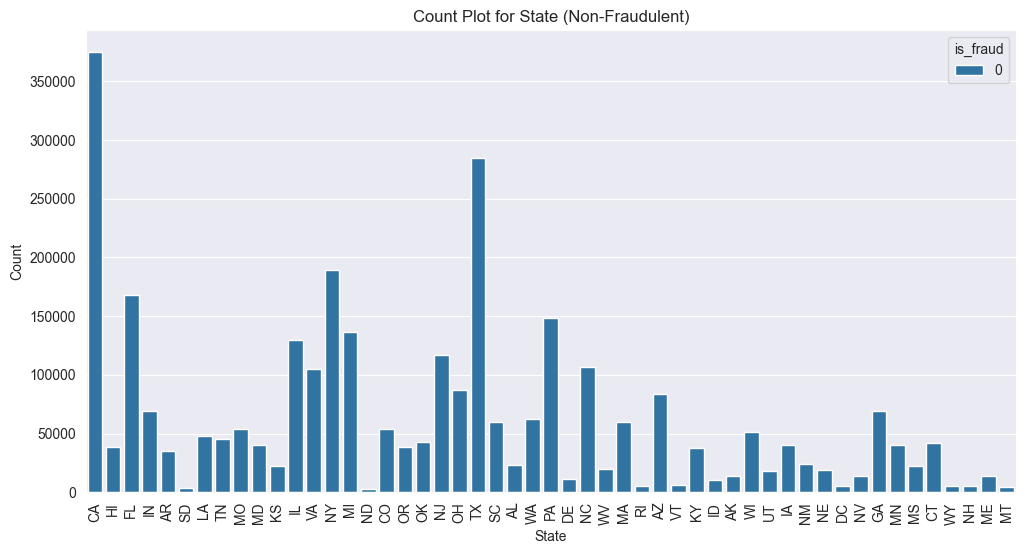

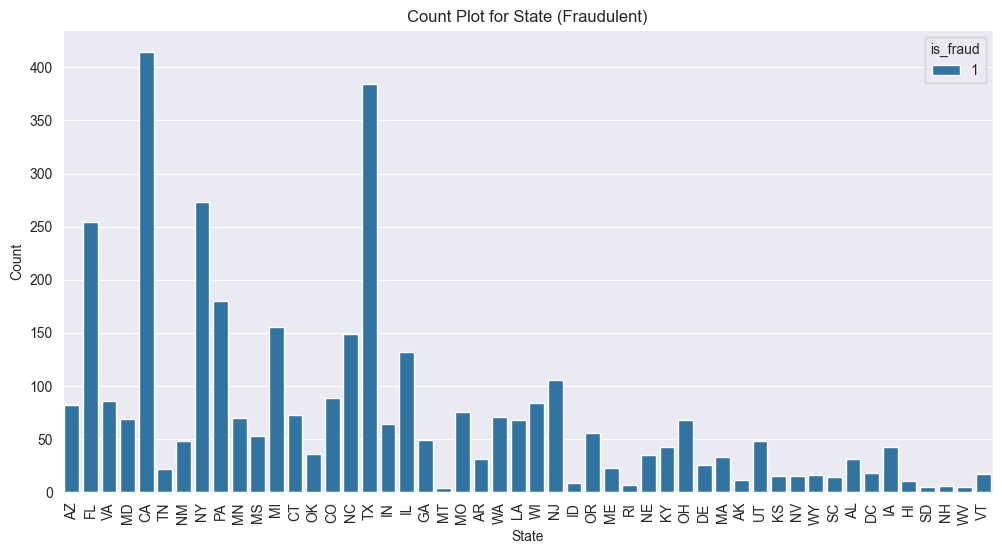

In [93]:
# Plot countplot as per the state
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plot = sns.countplot(data=df_train[negative_class], x='state', hue='is_fraud')
plot.set(xlabel='State', ylabel='Count', title='Count Plot for State (Non-Fraudulent)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plot = sns.countplot(data=df_train[positive_class], x='state', hue='is_fraud')
plot.set(xlabel='State', ylabel='Count', title='Count Plot for State (Fraudulent)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


#### Observation
##### Most of the fraud happens in CA state 

### To understand the fraudulant activity and  gain insights into the distribution and characteristics of various transaction-related features, Such as  geographical locations, customer occupations, and merchant involvement. This understanding can be valuable for further analysis and modeling tasks, such as identifying patterns, anomalies, or trends in the data.

In [94]:
print(pd.value_counts(df_train['street']))
print(pd.value_counts(df_train['city']))
print(pd.value_counts(df_train['state']))
print(pd.value_counts(df_train['zip']))
print(pd.value_counts(df_train['city_pop']))
print(pd.value_counts(df_train['job']))
print(pd.value_counts(df_train['merchant']))

street
757 Ronald Trail Apt. 965       8225
9464 Bruce Flat Suite 713       8205
2531 Diane Landing Apt. 510     8200
894 Rebecca Place               8194
059 Erika Walks                 8103
                                ... 
94240 Laura Square                 9
6613 Cynthia Roads Suite 048       8
0356 Obrien Way Apt. 279           6
841 Joseph Coves                   6
167 Leslie Center                  4
Name: count, Length: 976, dtype: int64
city
Brooklyn       53315
Denver         28081
Austin         26570
Houston        25378
Dallas         25264
               ...  
Macomb            10
Casselberry       10
Dandridge          8
Pensacola          6
New Britain        6
Name: count, Length: 721, dtype: int64
state
CA    375049
TX    285198
NY    189364
FL    168620
PA    148993
MI    136547
IL    130159
NJ    116887
NC    106727
VA    105043
OH     86933
AZ     83649
GA     69467
IN     69105
WA     62230
MA     59885
SC     59874
MO     54142
CO     53654
WI     51827
LA    

#### Observation based on the results high cardinality features like street, city, and merchant have a large number of unique values, which could lead to challenges in encoding them for modeling. Dropping these features for further exploration in the current analysis is a pragmatic approach, as it can simplify the modeling process and reduce computational complexity. However, it's also noted that these features could be valuable for future explorations with more computational resources to better understand their potential relationship with fraud activities. Hence better to drop these.

In [95]:
df_train = df_train.drop(['street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'merchant','merch_lat', 'merch_long', 'job'], axis=1)
print(pd.value_counts(df_train['category']))

category
shopping_pos      307453
home              294311
grocery_pos       292513
kids_pets         270733
gas_transport     265960
food_dining       233973
entertainment     228115
shopping_net      226672
personal_care     219148
misc_pos          205828
health_fitness    194777
misc_net          140849
grocery_net       134723
travel             99527
Name: count, dtype: int64


In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3114582 entries, 3240727 to 1257892
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   category   object        
 1   amt        float64       
 2   is_fraud   object        
 3   date       datetime64[ns]
 4   gender     object        
 5   age        int32         
 6   age_cat    category      
 7   date_year  int32         
 8   date_day   object        
 9   date_hour  int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 205.0+ MB


In [97]:
df_train.head()

,category,amt,is_fraud,date,gender,age,age_cat,date_year,date_day,date_hour
3240727,misc_net,6.31,0,2019-12-27 00:15:57,F,51,41-60,2019,Friday,0
3728492,health_fitness,9.60,0,2021-09-22 12:49:52,F,86,75+,2021,Wednesday,12
3562956,shopping_pos,1.35,0,2022-07-24 10:59:30,F,28,25-40,2022,Sunday,10
214319,kids_pets,92.84,0,2022-06-15 13:48:35,F,26,25-40,2022,Wednesday,13
2928596,grocery_pos,149.95,0,2019-11-16 03:38:37,M,22,<25,2019,Saturday,3


## Perform Feature engineering to extract meaningful patterns and relationships from raw data, enhancing the predictive power of machine learning models.

In [98]:
# Applying feature engineering in test set as well
df_test['age_cat'] = pd.cut(df_test['age'], bins = [-1,24, 40, 60, 75, 200], labels = ['<25', '25-40', '41-60', '61-75','75+'])
df_test['date_year'] = pd.to_datetime(df_test['date']).dt.year
df_test['date_day'] = pd.to_datetime(df_test['date']).dt.day_name()
df_test['date_hour'] = pd.to_datetime(df_test['date']).dt.hour

In [99]:
df_train.head(5)

,category,amt,is_fraud,date,gender,age,age_cat,date_year,date_day,date_hour
3240727,misc_net,6.31,0,2019-12-27 00:15:57,F,51,41-60,2019,Friday,0
3728492,health_fitness,9.60,0,2021-09-22 12:49:52,F,86,75+,2021,Wednesday,12
3562956,shopping_pos,1.35,0,2022-07-24 10:59:30,F,28,25-40,2022,Sunday,10
214319,kids_pets,92.84,0,2022-06-15 13:48:35,F,26,25-40,2022,Wednesday,13
2928596,grocery_pos,149.95,0,2019-11-16 03:38:37,M,22,<25,2019,Saturday,3


In [100]:
df_test = df_test.drop(['street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'merchant','merch_lat', 'merch_long', 'job'], axis=1)

In [101]:
# dropping date and age as we have subsets from these features to remove multicollinearity
df_train = df_train.drop(['age', 'date'], axis=1)
df_test = df_test.drop(['age', 'date'], axis=1)

In [102]:
df_test.head(5)

,category,amt,is_fraud,gender,age_cat,date_year,date_day,date_hour
2887776,food_dining,62.43,0,F,41-60,2021,Tuesday,9
3672614,grocery_net,61.31,0,F,25-40,2019,Thursday,18
2774303,grocery_pos,77.89,0,F,41-60,2019,Saturday,20
1319978,grocery_pos,12.03,0,F,61-75,2022,Monday,17
1862049,misc_pos,16.71,0,M,25-40,2020,Thursday,11


In [103]:
df_train.head(5)

,category,amt,is_fraud,gender,age_cat,date_year,date_day,date_hour
3240727,misc_net,6.31,0,F,41-60,2019,Friday,0
3728492,health_fitness,9.60,0,F,75+,2021,Wednesday,12
3562956,shopping_pos,1.35,0,F,25-40,2022,Sunday,10
214319,kids_pets,92.84,0,F,25-40,2022,Wednesday,13
2928596,grocery_pos,149.95,0,M,<25,2019,Saturday,3


### We can see there are more then two categorical variable in the dataset, hence will perform ONE_HOT_ENCODING,One-hot encoding is performed to convert categorical variables into a numerical format that can be used for machine learning algorithms, as many algorithms require numerical input. This process creates binary columns for each category, representing whether or not a particular category is present for each data point.


In [104]:
# Endcoing for train dataset
from sklearn.preprocessing import OneHotEncoder

def perform_one_hot_encoding(train_data, to_encode):
    encoding_train = OneHotEncoder().fit(train_data[to_encode])
    train_encoding = encoding_train.transform(train_data[to_encode]).toarray()
    encoded_train_data = pd.DataFrame(train_encoding, index=train_data.index, columns=encoding_train.get_feature_names_out(to_encode))
    train_data_enc = pd.merge(train_data, encoded_train_data, left_index=True, right_index=True)

    return train_data_enc

to_one_hot_encode = ['category', 'age_cat', 'date_year', 'date_day']
df_train_encoded = perform_one_hot_encoding(df_train, to_one_hot_encode)

df_train_encoded = df_train_encoded.drop(to_one_hot_encode, axis = 1)
df_train_encoded


,amt,is_fraud,gender,date_hour,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
3240727,6.31,0,F,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3728492,9.60,0,F,12,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3562956,1.35,0,F,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
214319,92.84,0,F,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2928596,149.95,0,M,3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842705,21.93,0,M,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1516426,2.35,0,M,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2580244,15.31,0,F,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3626154,9.11,0,F,14,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Endcoing for test dataset
from sklearn.preprocessing import OneHotEncoder

def perform_one_hot_encoding(test_data, to_encode):
    encoding_test = OneHotEncoder().fit(test_data[to_encode])
    test_encoding = encoding_test.transform(test_data[to_encode]).toarray()
    encoded_train_data = pd.DataFrame(test_encoding, index=test_data.index, columns=encoding_test.get_feature_names_out(to_encode))
    train_data_enc = pd.merge(test_data, encoded_train_data, left_index=True, right_index=True)

    return train_data_enc

to_one_hot_encode = ['category', 'age_cat', 'date_year', 'date_day']
df_test_encoded = perform_one_hot_encoding(df_test, to_one_hot_encode)

df_test_encoded = df_test_encoded.drop(to_one_hot_encode, axis = 1)
df_test_encoded


,amt,is_fraud,gender,date_hour,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
2887776,62.43,0,F,9,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3672614,61.31,0,F,18,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2774303,77.89,0,F,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1319978,12.03,0,F,17,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1862049,16.71,0,M,11,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579988,2.96,0,M,11,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2111743,9.97,0,M,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3159724,2.95,0,F,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3978863,77.45,0,F,16,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Label Encoder  the 'gender' column  have categories like 'M' and 'F', which can be assigned numerical labels like 0 and 1 using label encoding to both train and test data set

In [106]:
from sklearn.preprocessing import LabelEncoder

def perform_label_encoding(train_data, test_data, list_col_name):
    for col in list_col_name:
        labelenc = LabelEncoder()
        train_data[col] = labelenc.fit_transform(train_data[col])
        test_data[col] = labelenc.transform(test_data[col])
    return train_data, test_data

to_label_encode = ['gender']
df_train_encoded, df_test_encoded = perform_label_encoding(df_train_encoded, df_test_encoded, to_label_encode)

df_train_encoded['is_fraud'] = df_train_encoded['is_fraud'].astype(int)
df_test_encoded['is_fraud'] = df_test_encoded['is_fraud'].astype(int)
df_train_encoded[df_train_encoded.duplicated]

,amt,is_fraud,gender,date_hour,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
2530073,5.82,0,0,7,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3665242,1.40,0,0,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4013288,52.17,0,0,9,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
548979,4.64,0,1,8,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3550883,2.28,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126517,5.62,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
677583,3.01,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4077665,4.28,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2336813,4.09,0,1,16,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
df_train_encoded = df_train_encoded.drop_duplicates(keep='first')
df_train_encoded

,amt,is_fraud,gender,date_hour,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
3240727,6.31,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3728492,9.60,0,0,12,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3562956,1.35,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
214319,92.84,0,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2928596,149.95,0,1,3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842705,21.93,0,1,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1516426,2.35,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2580244,15.31,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3626154,9.11,0,0,14,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Start modeling
# Model 1 Logistic Regression


In [108]:
#This Function is designed to train a logistic regression model, evaluate its performance on both training and test datasets, and provide detailed cl

import warnings
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


warnings.filterwarnings('ignore')

def plot_confusion_matrix_heatmap(data, title_name):
    ax= plt.subplot()
    sns.heatmap(data, annot=True, fmt='g', cmap="viridis")
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")
    ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    ax.set_title("Confusion Matrix for " + title_name)

    plt.show()

def predict_lr_model(X_train, y_train, X_test, y_test):

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('-'*53)
    print("TRAINING SCORES")
    print('-'*53)
    report = classification_report(y_train, y_pred_train)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_train, y_pred_train)
    plot_confusion_matrix_heatmap(cnf, "Training Scores")
    print('-'*53)
    print("TEST SCORES")
    print('-'*53)
    report = classification_report(y_test, y_pred_test)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix_heatmap(cnf, "Test Scores")


In [109]:
X_train = df_train_encoded.drop('is_fraud', axis=1)
X_test = df_test_encoded.drop('is_fraud', axis=1)
y_test = df_test_encoded[['is_fraud']]
y_train = df_train_encoded[['is_fraud']]

### Perform Feature Scalling 
#### feature scaling using standardization on the training and test datasets.

In [110]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3052912
           1       0.00      0.00      0.00      3679

    accuracy                           1.00   3056591
   macro avg       0.50      0.50      0.50   3056591
weighted avg       1.00      1.00      1.00   3056591

-----------------------------------------------------


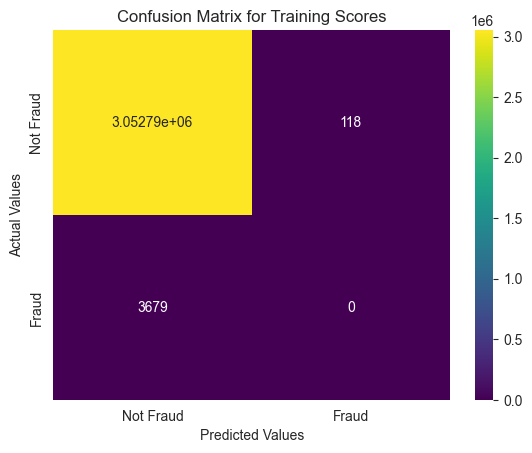

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.00      0.00      0.00      1226

    accuracy                           1.00   1038194
   macro avg       0.50      0.50      0.50   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------


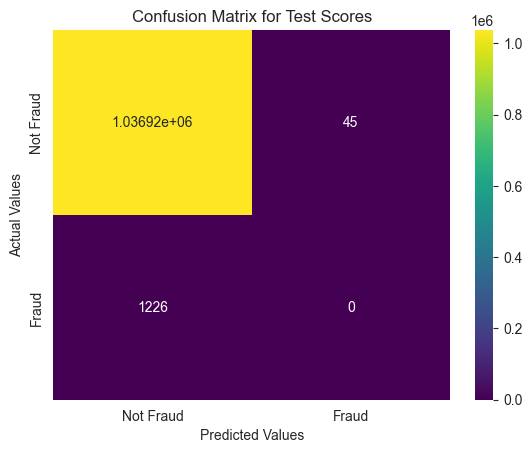

In [111]:
predict_lr_model(X_train_scaled, y_train, X_test_scaled, y_test)

### Observation
#### The training and test scores indicate that the model is overfitting to the majority class (non-fraudulent transactions).
#### The precision, recall, and F1-score for the minority class (fraudulent transactions) are all 0, indicating that the model is not detecting any fraudulent transactions.
#### The accuracy and weighted average scores are high, but this is misleading due to the class imbalance.
#### This model is not a good fit for the dataset due to its inability to detect fraudulent transactions. By addressing the class imbalance and using appropriate metrics, we can develop more effective model for this problem.lets start with Random Forest model

## Model 2 Random Forest Tree

----------------------------------------------------------------------------------------------------
FOR Random Forest Classifier
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   3052912
           1       0.04      0.93      0.08      3679

    accuracy                           0.97   3056591
   macro avg       0.52      0.95      0.53   3056591
weighted avg       1.00      0.97      0.99   3056591

-----------------------------------------------------


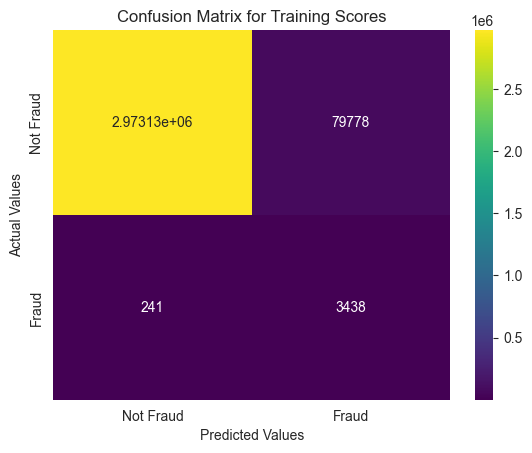

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1036968
           1       0.04      0.88      0.07      1226

    accuracy                           0.97   1038194
   macro avg       0.52      0.93      0.53   1038194
weighted avg       1.00      0.97      0.99   1038194

-----------------------------------------------------


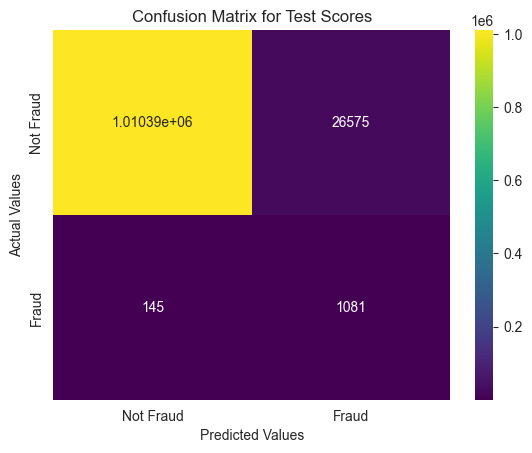

In [112]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_prediction(X_train, y_train, X_test, y_test):
    print('-'*100)
    print("FOR Random Forest Classifier")
    print('-'*100)
    model = RandomForestClassifier(max_depth=10, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('-'*53)
    print("TRAINING SCORES")
    print('-'*53)
    report = classification_report(y_train, y_pred_train)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_train, y_pred_train)
    plot_confusion_matrix_heatmap(cnf, "Training Scores")
    print('-'*53)
    print("TEST SCORES")
    print('-'*53)
    report = classification_report(y_test, y_pred_test)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix_heatmap(cnf, "Test Scores")

# Call the function
random_forest_prediction(X_train_scaled, y_train, X_test_scaled, y_test)

#### Observation -- The Random Forest Classifier with a maximum depth of 10 and balanced class weights shows a significant imbalance in predicting fraudulent transactions. While the model achieves near-perfect precision and recall for the majority class (Not Fraud), it struggles with the minority class (Fraud), showing high recall but extremely low precision. This indicates that the model is heavily biased towards the majority class, despite the class balancing efforts.

## Model 2 Decision Tree classifier

----------------------------------------------------------------------------------------------------
FOR Decision Tree Classifier
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3052912
           1       0.87      0.51      0.64      3679

    accuracy                           1.00   3056591
   macro avg       0.93      0.75      0.82   3056591
weighted avg       1.00      1.00      1.00   3056591

-----------------------------------------------------


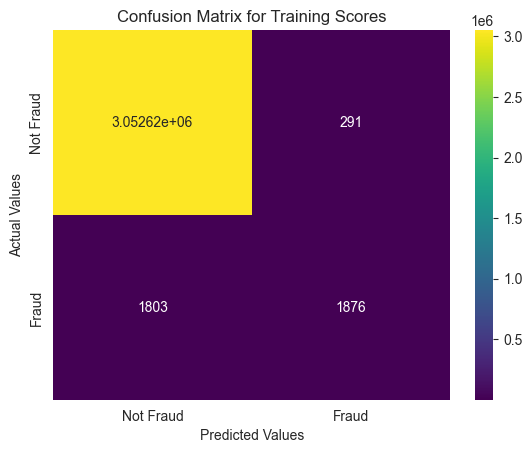

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.46      0.58      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------


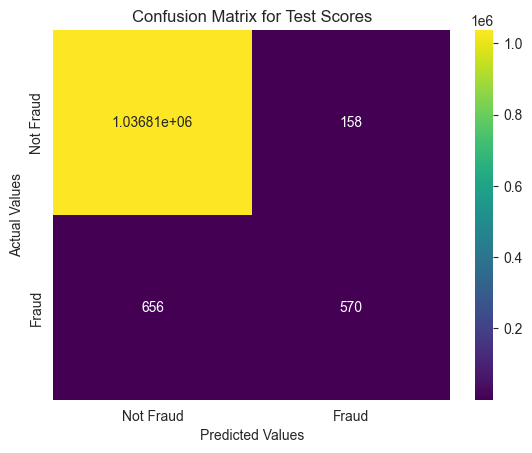

In [113]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix_heatmap(data, title_name):
    ax= plt.subplot()
    sns.heatmap(data, annot=True, fmt='g', cmap="viridis")
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")
    ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])
    ax.set_title("Confusion Matrix for " + title_name)
    plt.show()

def decision_tree_prediction(X_train, y_train, X_test, y_test):
    print('-'*100)
    print("FOR Decision Tree Classifier")
    print('-'*100)
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('-'*53)
    print("TRAINING SCORES")
    print('-'*53)
    report = classification_report(y_train, y_pred_train)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_train, y_pred_train)
    plot_confusion_matrix_heatmap(cnf, "Training Scores")
    print('-'*53)
    print("TEST SCORES")
    print('-'*53)
    report = classification_report(y_test, y_pred_test)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix_heatmap(cnf, "Test Scores")

# Call the functions separately
decision_tree_prediction(X_train_scaled, y_train, X_test_scaled, y_test)


#### Observation The Decision Tree Classifier with a maximum depth of 10 shows high performance on the training and test datasets for predicting non-fraudulent transactions, with precision, recall, and f1-scores all close to 1.00 for class 0 (Not Fraud). However, the model's performance for the minority class (Fraud) is significantly lower. On the training set, the precision is 0.87, recall is 0.50, and f1-score is 0.64 for class 1 (Fraud). On the test set, the precision is 0.81, recall is 0.45, and f1-score is 0.58. This indicates that while the model is very accurate in identifying non-fraudulent transactions, it struggles with detecting fraudulent transactions, likely due to class imbalance in the dataset. "Unlike Logistic Regression, Decision Trees can identify and predict fraudulent cases, thanks to their ability to handle complex interactions and non-linear relationships."

In [114]:
df_train_encoded

,amt,is_fraud,gender,date_hour,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Sunday,date_day_Thursday,date_day_Tuesday,date_day_Wednesday
3240727,6.31,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3728492,9.60,0,0,12,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3562956,1.35,0,0,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
214319,92.84,0,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2928596,149.95,0,1,3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842705,21.93,0,1,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1516426,2.35,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2580244,15.31,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3626154,9.11,0,0,14,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
categorical_features = df_train_encoded.columns.drop(['amt'])
numerical_features = df_train_encoded[['amt']].columns

### Using Chi-squared test for finding correlation where the both independent and dependent features are categorical and chi-squared is most commonly used for this type of cases(Brownlee, 2019).

In [116]:
def check_chi2_importance(df):
    drop_columns = []
    for features in df:
        if(features!='is_fraud'):
            scores, p_value = chi2(np.array(df[features]).reshape(-1,1), np.array(df['is_fraud']).reshape(-1,1))
            if (p_value<=0.05):
                print(features + " has IMPORTANT CORRELATION")
            else:
                drop_columns.append(features)
                print(features + " can be dropped")
    return drop_columns

drop_cols = check_chi2_importance(df_train_encoded[categorical_features])

gender can be dropped
date_hour has IMPORTANT CORRELATION
category_entertainment has IMPORTANT CORRELATION
category_food_dining has IMPORTANT CORRELATION
category_gas_transport can be dropped
category_grocery_net has IMPORTANT CORRELATION
category_grocery_pos has IMPORTANT CORRELATION
category_health_fitness has IMPORTANT CORRELATION
category_home has IMPORTANT CORRELATION
category_kids_pets has IMPORTANT CORRELATION
category_misc_net has IMPORTANT CORRELATION
category_misc_pos has IMPORTANT CORRELATION
category_personal_care has IMPORTANT CORRELATION
category_shopping_net has IMPORTANT CORRELATION
category_shopping_pos has IMPORTANT CORRELATION
category_travel has IMPORTANT CORRELATION
age_cat_25-40 has IMPORTANT CORRELATION
age_cat_41-60 can be dropped
age_cat_61-75 has IMPORTANT CORRELATION
age_cat_75+ has IMPORTANT CORRELATION
age_cat_<25 has IMPORTANT CORRELATION
date_year_2018 can be dropped
date_year_2019 has IMPORTANT CORRELATION
date_year_2020 has IMPORTANT CORRELATION
date_ye

### Using Anova test for finding correlation between the numerical independent feature and categorical dependent feature (Brownlee, 2019).

In [117]:
from sklearn.feature_selection import f_oneway

def check_one_way_anova_importance(df):
    scores, p_value = f_oneway(np.array(df['amt']).reshape(-1,1), np.array(df['is_fraud']).reshape(-1,1))
    if (p_value<=0.05):
        print('amt' + " has IMPORTANT CORRELATION")
    else:
        print('amt' + " can be dropped")

check_one_way_anova_importance(df_train_encoded)

# Print columns to be dropped
print("Columns to be dropped:", drop_cols)

# Verify if the columns to be dropped exist in the DataFrame
missing_cols = [col for col in drop_cols if col not in df_train_encoded.columns]
if missing_cols:
    print("The following columns to be dropped are not found in the DataFrame:", missing_cols)
else:
    df_train_encoded = df_train_encoded.drop(drop_cols, axis=1)
    df_test_encoded = df_test_encoded.drop(drop_cols, axis=1)
    print("Columns successfully dropped.")

# Print the resulting DataFrame columns to verify
print("Remaining columns in df_train_encoded:", df_train_encoded.columns)
print("Remaining columns in df_test_encoded:", df_test_encoded.columns)


amt has IMPORTANT CORRELATION
Columns to be dropped: ['gender', 'category_gas_transport', 'age_cat_41-60', 'date_year_2018', 'date_day_Sunday', 'date_day_Thursday']
Columns successfully dropped.
Remaining columns in df_train_encoded: Index(['amt', 'is_fraud', 'date_hour', 'category_entertainment',
       'category_food_dining', 'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'age_cat_25-40', 'age_cat_61-75', 'age_cat_75+', 'age_cat_<25',
       'date_year_2019', 'date_year_2020', 'date_year_2021', 'date_year_2022',
       'date_day_Friday', 'date_day_Monday', 'date_day_Saturday',
       'date_day_Tuesday', 'date_day_Wednesday'],
      dtype='object')
Remaining columns in df_test_encoded: Index(['amt', 'is_fraud', 'date_hour', 'category_entertainment',
       

In [118]:
drop_cols

['gender',
 'category_gas_transport',
 'age_cat_41-60',
 'date_year_2018',
 'date_day_Sunday',
 'date_day_Thursday']

In [119]:
df_train_encoded[df_train_encoded.duplicated]

,amt,is_fraud,date_hour,category_entertainment,category_food_dining,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,age_cat_<25,date_year_2019,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Tuesday,date_day_Wednesday
1506338,1.96,0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
813668,57.58,0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906766,1.42,0,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2454794,5.44,0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
164678,49.64,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572791,4.50,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3210093,2.70,0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585753,42.01,0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3363286,8.20,0,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
df_train_encoded = df_train_encoded.drop_duplicates(keep='first')

In [121]:
df_train_encoded

,amt,is_fraud,date_hour,category_entertainment,category_food_dining,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,age_cat_<25,date_year_2019,date_year_2020,date_year_2021,date_year_2022,date_day_Friday,date_day_Monday,date_day_Saturday,date_day_Tuesday,date_day_Wednesday
3240727,6.31,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3728492,9.60,0,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3562956,1.35,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
214319,92.84,0,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2928596,149.95,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842705,21.93,0,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1516426,2.35,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2580244,15.31,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3626154,9.11,0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [122]:
# Ensure that the same columns are present in both training and testing datasets
common_columns = df_train_encoded.columns.intersection(df_test_encoded.columns)

# Extract features and target variables
X_train = df_train_encoded[common_columns].drop('is_fraud', axis=1)
X_test = df_test_encoded[common_columns].drop('is_fraud', axis=1)
y_train = df_train_encoded['is_fraud']
y_test = df_test_encoded['is_fraud']

# Standardize features
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


----------------------------------------------------------------------------------------------------
FOR Decision Tree Classifier
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2981890
           1       0.86      0.51      0.64      3679

    accuracy                           1.00   2985569
   macro avg       0.93      0.75      0.82   2985569
weighted avg       1.00      1.00      1.00   2985569

-----------------------------------------------------


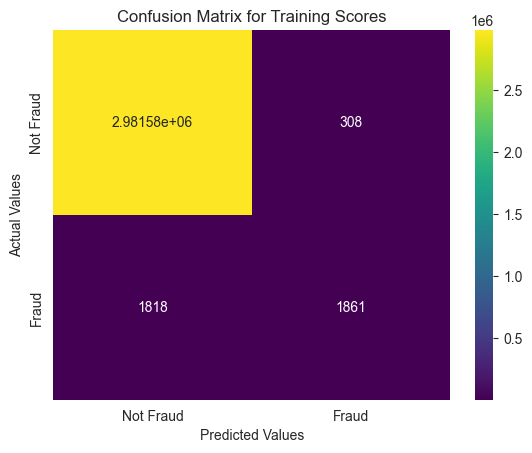

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.47      0.58      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------


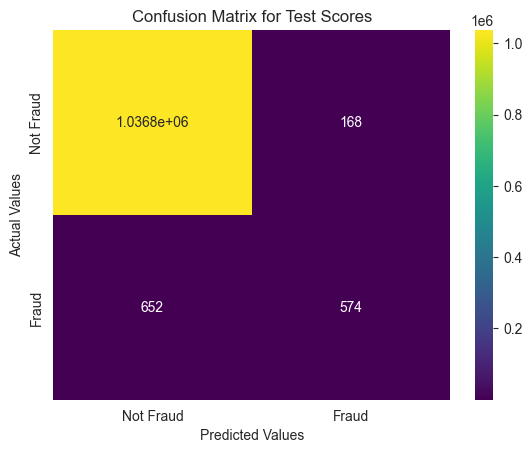

In [123]:
decision_tree_prediction(X_train_scaled, y_train, X_test_scaled, y_test)

In [124]:
def decision_tree_prediction(model, X_train, y_train, X_test, y_test):
    print('-'*100)
    print("FOR Decision Tree Classifier")
    print('-'*100)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('-'*53)
    print("TRAINING SCORES")
    print('-'*53)
    report = classification_report(y_train, y_pred_train)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_train, y_pred_train)
    plot_confusion_matrix_heatmap(cnf, "Training Scores")
    print('-'*53)
    print("TEST SCORES")
    print('-'*53)
    report = classification_report(y_test, y_pred_test)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix_heatmap(cnf, "Test Scores")


----------------------------------------------------------------------------------------------------
FOR Decision Tree Classifier
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2981890
           1       0.92      0.65      0.76      3679

    accuracy                           1.00   2985569
   macro avg       0.96      0.82      0.88   2985569
weighted avg       1.00      1.00      1.00   2985569

-----------------------------------------------------


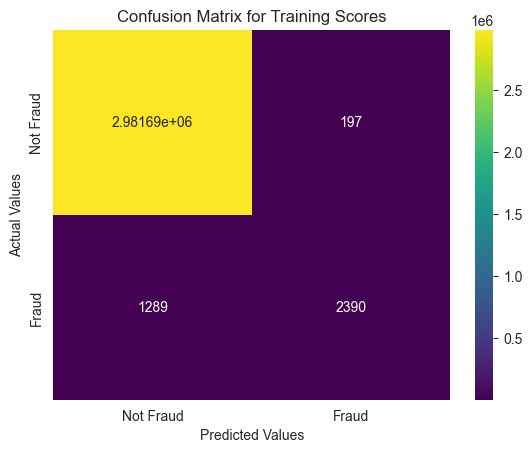

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.83      0.55      0.66      1226

    accuracy                           1.00   1038194
   macro avg       0.92      0.78      0.83   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------


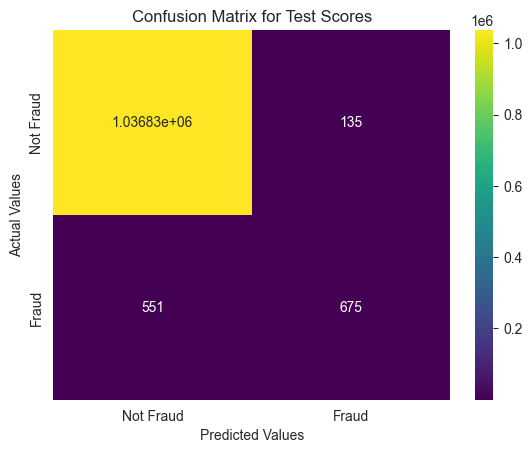

In [125]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=10, n_jobs=-1)
decision_tree_prediction(model, X_train_scaled, y_train, X_test_scaled, y_test)


#### Observations:
Using Chi-squared tests and one-way ANOVA for selecting categorical features proved effective. The model's performance did not significantly decrease even after removing these features from the dataset.
XGBoost demonstrated the best performance among the three models tested.
#### Further Experiments:
Evaluating XGBoost and Decision Tree on multiple dataset splits to assess robustness.
Performing hyperparameter tuning on the best model to potentially enhance its performance.

### Perform Cross validation for model evaluation, hyperparameter tuning, and ensuring the generalization of the model to unseen data.

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score
def get_cross_validation_scores(precision, recall, f1, model_name):
    precision_score = np.mean(precision)
    precision_std = 2*np.std(precision)
    recall_score = np.mean(recall)
    recall_std = 2*np.std(recall)
    f1_score = np.mean(f1)
    f1_std = 2*np.std(f1)
    print("-"*52)
    print("THE CROSS VALIDATION SCORE FOR " + str(model_name))
    print("-"*52)

    print("Precision: " + str(precision_score) + " +- " + str(precision_std))
    print("Recall: " + str(recall_score) + " +- " + str(recall_std))
    print("F1_score: " + str(f1_score) + " +- " + str(f1_std))
    print("-"*52)


def model_cross_validation(model_name, precision_score_list, recall_score_list, f1_score_list):
    for counts in range(5):
        X_train, X_val, y_train, y_val = train_test_split(df_train_encoded.drop("is_fraud", axis=1), df_train_encoded.is_fraud, test_size=0.25,
                                                         random_state=counts, stratify=df_train_encoded.is_fraud)
        model = model_name
        X_train = std_scaler.fit_transform(X_train)
        X_val = std_scaler.transform(X_val)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        precision_score_list.append(precision_score(y_val, y_pred))
        recall_score_list.append(recall_score(y_val, y_pred))
        f1_score_list.append(f1_score(y_val, y_pred))

    get_cross_validation_scores(precision_score_list, recall_score_list, f1_score_list, model_name)

models = [DecisionTreeClassifier(max_depth=10), XGBClassifier(max_depth=10, n_jobs=-1)]

for model_name in models:
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    model_cross_validation(model_name, precision_score_list, recall_score_list, f1_score_list)

----------------------------------------------------
THE CROSS VALIDATION SCORE FOR DecisionTreeClassifier(max_depth=10)
----------------------------------------------------
Precision: 0.78771290134081 +- 0.0319942576026772
Recall: 0.44586956521739135 +- 0.05078588434938727
F1_score: 0.5692377080758977 +- 0.04909344336525161
----------------------------------------------------
----------------------------------------------------
THE CROSS VALIDATION SCORE FOR XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max


The DecisionTreeClassifier shows lower precision, recall, and F1-score compared to XGBClassifier, indicating poorer performance. Consider further tuning DecisionTreeClassifier parameters or exploring other algorithms for improved results. and hence to Handle imbalance data using Undersampling technique. As oversampling itself would create more instances while fitting the model which would make the system more complex.



In [127]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, OneSidedSelection, RepeatedEditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


def get_cross_validation_scores_sampling(precision, recall, f1, model_name, technique_name):
    precision_score = np.mean(precision)
    precision_std = 2*np.std(precision)
    recall_score = np.mean(recall)
    recall_std = 2*np.std(recall)
    f1_score = np.mean(f1)
    f1_std = 2*np.std(f1)
    print("-"*60)
    print("THE CROSS VALIDATION SCORE FOR " + str(model_name) + " using " + str(technique_name) + " Sampling Technique ")
    print("-"*60)

    print("Precision: " + str(precision_score) + " +- " + str(precision_std))
    print("Recall: " + str(recall_score) + " +- " + str(recall_std))
    print("F1_score: " + str(f1_score) + " +- " + str(f1_std))
    print("-"*60)

def model_with_sampling(model_name, sampler_strategy, precision_score_list, recall_score_list, f1_score_list):
    for counts in range(1):
        X_train, X_val, y_train, y_val = train_test_split(df_train_encoded.drop("is_fraud", axis=1), df_train_encoded.is_fraud, test_size=0.25,
                                                         random_state=counts, stratify=df_train_encoded.is_fraud)
        model = model_name
        sampler = RandomUnderSampler(sampling_strategy=sampler_strategy)
        X_sampler, y_sampler = sampler.fit_resample(X_train, y_train)
        print("CLASSES RATIO FOR TRAINING: Random Undersampler with strategy= ", sampler_strategy)
        print(pd.value_counts(y_sampler))
        X_train = std_scaler.fit_transform(X_sampler)
        X_val = std_scaler.transform(X_val)
        model.fit(X_train, y_sampler)
        y_pred = model.predict(X_val)
        precision_score_list.append(precision_score(y_val, y_pred))
        recall_score_list.append(recall_score(y_val, y_pred))
        f1_score_list.append(f1_score(y_val, y_pred))

    get_cross_validation_scores_sampling(precision_score_list, recall_score_list, f1_score_list, model_name, sampler)

models = [DecisionTreeClassifier(max_depth=10)]

for model_name in models:
    sampling_strategy_list = [0.01, 0.05, 0.1,0.3,0.5,0.7,0.9]
    for sampler in sampling_strategy_list:
        precision_score_list = []
        recall_score_list = []
        f1_score_list = []
        model_with_sampling(model_name, sampler, precision_score_list, recall_score_list, f1_score_list)

CLASSES RATIO FOR TRAINING: Random Undersampler with strategy=  0.01
is_fraud
0    275900
1      2759
Name: count, dtype: int64
------------------------------------------------------------
THE CROSS VALIDATION SCORE FOR DecisionTreeClassifier(max_depth=10) using RandomUnderSampler(sampling_strategy=0.01) Sampling Technique 
------------------------------------------------------------
Precision: 0.3801939058171745 +- 0.0
Recall: 0.5967391304347827 +- 0.0
F1_score: 0.46446700507614214 +- 0.0
------------------------------------------------------------
CLASSES RATIO FOR TRAINING: Random Undersampler with strategy=  0.05
is_fraud
0    55180
1     2759
Name: count, dtype: int64
------------------------------------------------------------
THE CROSS VALIDATION SCORE FOR DecisionTreeClassifier(max_depth=10) using RandomUnderSampler(sampling_strategy=0.05) Sampling Technique 
------------------------------------------------------------
Precision: 0.13632669646485168 +- 0.0
Recall: 0.72934782608

The performance of DecisionTreeClassifier significantly improves with RandomUnderSampler, as shown by increased recall scores. However, precision and F1-score decline, indicating a trade-off between correctly identifying fraud cases and incorrectly labeling non-fraudulent transactions. Consider adjusting the sampling strategy to balance these metrics.
#### Observations:
Different sampling techniques with varying ratios were tested. However, the model's performance did not surpass the previous scores. Undersampling did not work as expected, likely because it removed important information from the dataset.
Although XGBoost with hyperparameter tuning requires significant computational resources, its performance remained consistent across different folds.
The Decision Tree model also showed stability across different folds, but its F1 scores were lower compared to XGBoost.

### Tuning Hyperparameters of Decision Tree model

In [128]:
from sklearn import tree

def get_tree(model):
    fig = plt.figure(figsize=(15,8))
    _ = tree.plot_tree(model,
                       feature_names=X_train.columns,
                       class_names=["No fraud", "Fraud"],
                       filled=True)

In [129]:
from sklearn.metrics import f1_score as f1_metric

def predict_dt_model(model_type, X_train, y_train, X_test, y_test):
    print('-'*100)
    print("FOR " + str(model_type))
    print('-'*100)
    model = model_type
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('-'*53)
    print("TRAINING SCORES")
    print('-'*53)
    report = classification_report(y_train, y_pred_train)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_train, y_pred_train)
    plot_confusion_matrix_heatmap(cnf, "Training Scores")
    print('-'*53)
    print("TEST SCORES")
    print('-'*53)
    report = classification_report(y_test, y_pred_test)
    print(report)
    print('-'*53)
    cnf = confusion_matrix(y_test, y_pred_test)
    print(cnf)
    f1 = f1_metric(y_test, y_pred_test)
    return f1

----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=1)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2981890
           1       0.00      0.00      0.00      3679

    accuracy                           1.00   2985569
   macro avg       0.50      0.50      0.50   2985569
weighted avg       1.00      1.00      1.00   2985569

-----------------------------------------------------


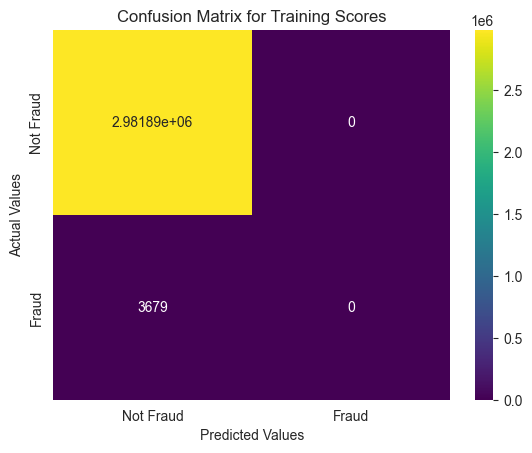

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.00      0.00      0.00      1226

    accuracy                           1.00   1038194
   macro avg       0.50      0.50      0.50   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036968       0]
 [   1226       0]]
[0.0]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=2)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00

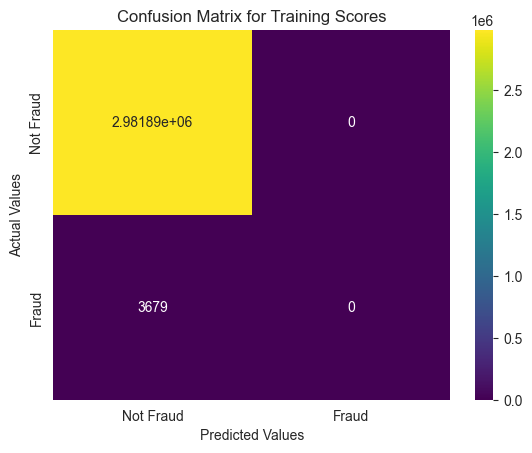

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.00      0.00      0.00      1226

    accuracy                           1.00   1038194
   macro avg       0.50      0.50      0.50   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036968       0]
 [   1226       0]]
[0.0, 0.0]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=3)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00     

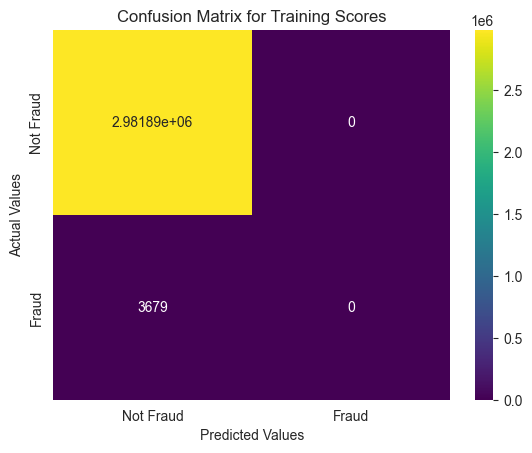

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.00      0.00      0.00      1226

    accuracy                           1.00   1038194
   macro avg       0.50      0.50      0.50   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036968       0]
 [   1226       0]]
[0.0, 0.0, 0.0]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=4)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00

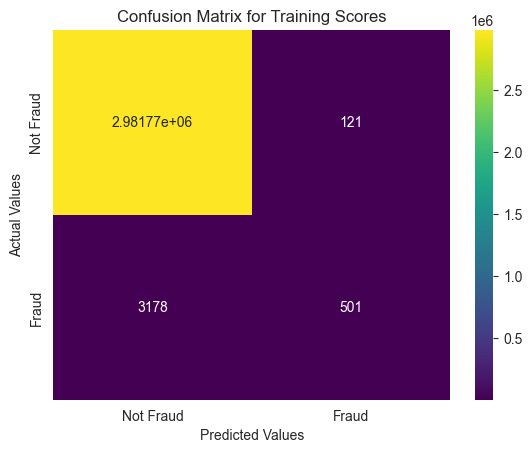

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.84      0.15      0.25      1226

    accuracy                           1.00   1038194
   macro avg       0.92      0.57      0.62   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036933      35]
 [   1047     179]]
[0.0, 0.0, 0.0, 0.24861111111111112]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=5)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

  

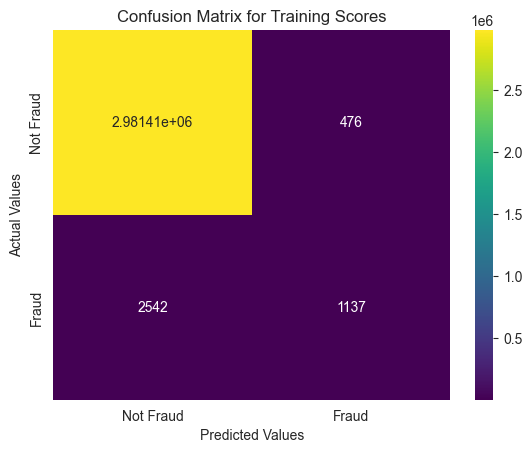

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.67      0.32      0.44      1226

    accuracy                           1.00   1038194
   macro avg       0.83      0.66      0.72   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036773     195]
 [    829     397]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=6)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1

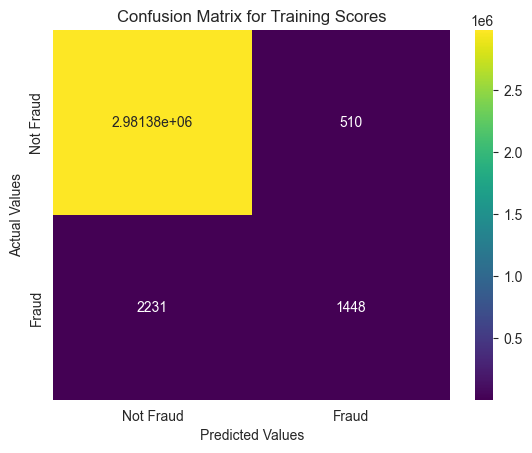

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.71      0.40      0.51      1226

    accuracy                           1.00   1038194
   macro avg       0.85      0.70      0.76   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036766     202]
 [    732     494]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367, 0.514047866805411]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=7)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              prec

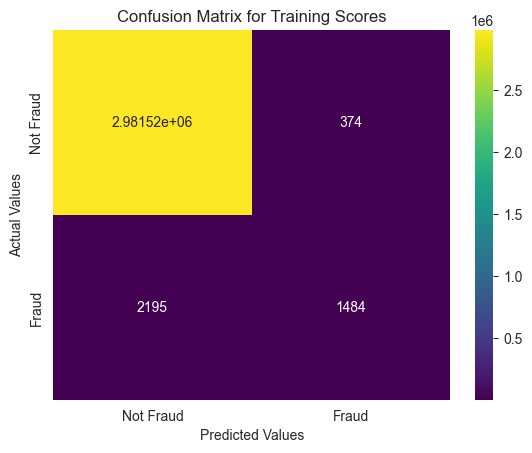

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.76      0.41      0.53      1226

    accuracy                           1.00   1038194
   macro avg       0.88      0.70      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036812     156]
 [    727     499]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367, 0.514047866805411, 0.53056884635832]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=8)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------


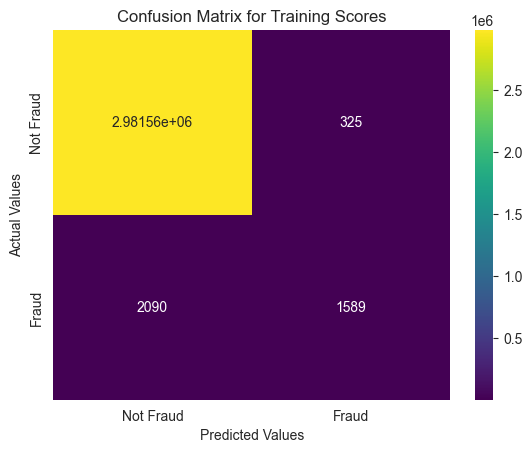

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.42      0.55      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036816     152]
 [    708     518]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367, 0.514047866805411, 0.53056884635832, 0.5464135021097047]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
----------------------------------

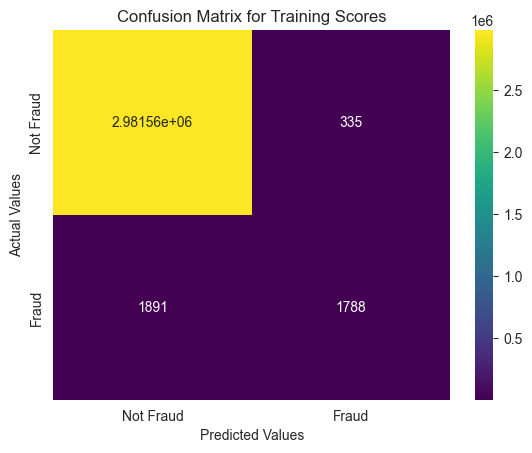

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.46      0.58      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036804     164]
 [    663     563]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367, 0.514047866805411, 0.53056884635832, 0.5464135021097047, 0.5765488991295443]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=10)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-------------

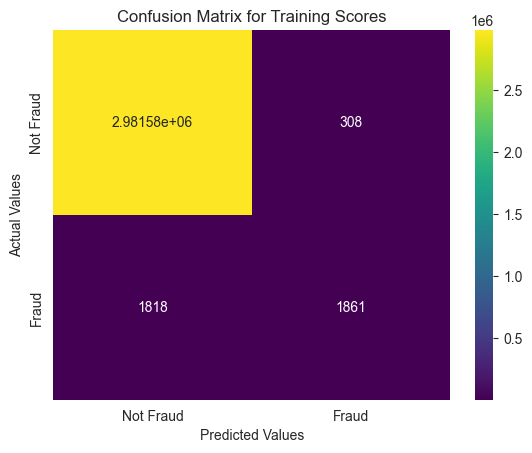

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.47      0.59      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.74      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036801     167]
 [    647     579]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367, 0.514047866805411, 0.53056884635832, 0.5464135021097047, 0.5765488991295443, 0.5872210953346856]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=11)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING 

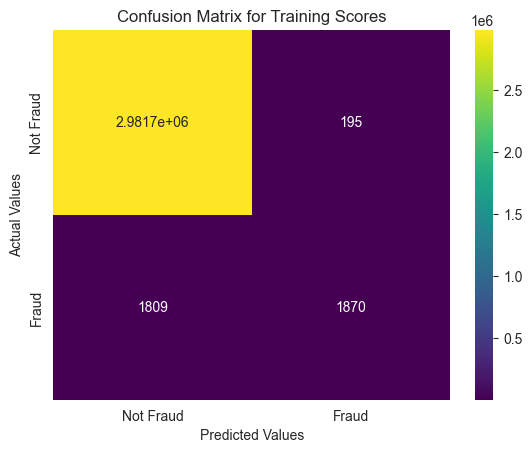

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.45      0.57      1226

    accuracy                           1.00   1038194
   macro avg       0.88      0.72      0.78   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036804     164]
 [    676     550]]
[0.0, 0.0, 0.0, 0.24861111111111112, 0.4367436743674367, 0.514047866805411, 0.53056884635832, 0.5464135021097047, 0.5765488991295443, 0.5872210953346856, 0.5670103092783505]


In [130]:

depth = list(range(1, 12, 1))
f1_score = []
for n in depth:
    f1_agg = predict_dt_model(DecisionTreeClassifier(max_depth=n), X_train_scaled, y_train, X_test_scaled, y_test)
    f1_score.append(f1_agg)
    print(f1_score)

#### The decision tree model is able to classify positive classes only after the depth of the tree is greater than or equals to (>=) 4
Try other machine learning algorithms, such as Random Forest or Gradient Boosting, to compare their performance with Decision Tree Classifier.
Experiment with hyperparameter tuning for the best-performing algorithm to further improve its performance.
Consider feature engineering or dimensionality reduction techniques to enhance the dataset and improve model performance.
Evaluate the model's performance on a larger, more diverse dataset to ensure generalizability.
Consider using techniques like cross-validation to ensure the model's performance is not overfitting or underfitting.

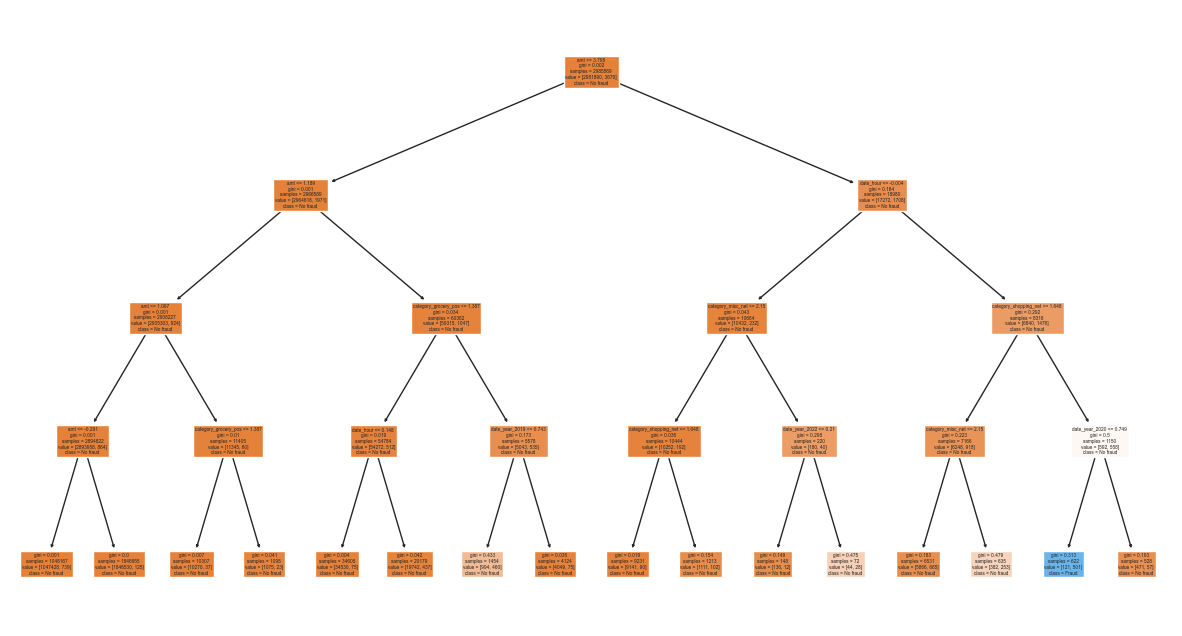

In [131]:
dec_tree =DecisionTreeClassifier(max_depth=4)
dec_tree.fit(X_train_scaled, y_train)
get_tree(dec_tree)

----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2981890
           1       0.84      0.49      0.62      3679

    accuracy                           1.00   2985569
   macro avg       0.92      0.74      0.81   2985569
weighted avg       1.00      1.00      1.00   2985569

-----------------------------------------------------


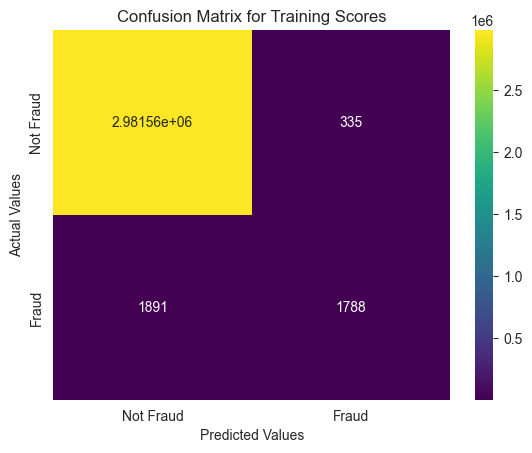

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.46      0.57      1226

    accuracy                           1.00   1038194
   macro avg       0.88      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036800     168]
 [    664     562]]
[0.5746421267893661]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, min_samples_split=3)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   suppor

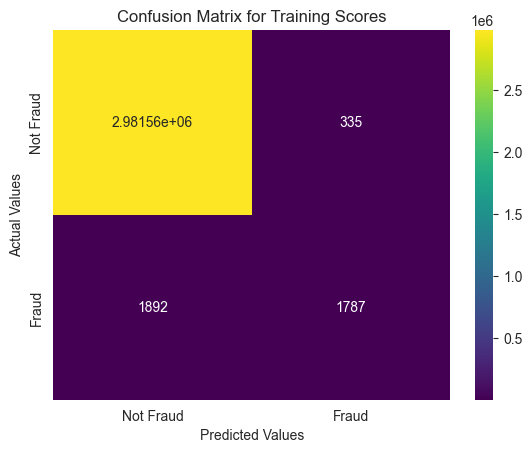

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.46      0.57      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036803     165]
 [    668     558]]
[0.5746421267893661, 0.5726013340174448]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, min_samples_split=4)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recal

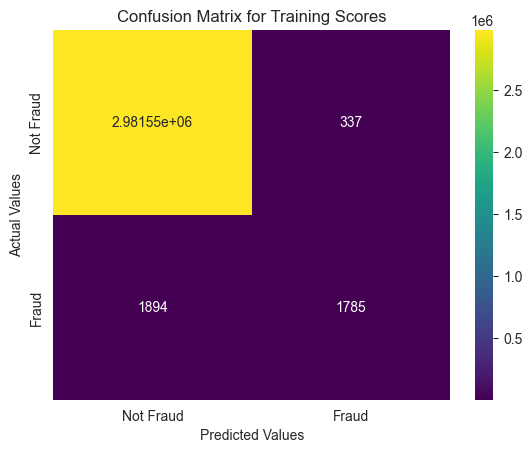

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.46      0.57      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036805     163]
 [    666     560]]
[0.5746421267893661, 0.5726013340174448, 0.5746536685479733]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, min_samples_split=5)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
            

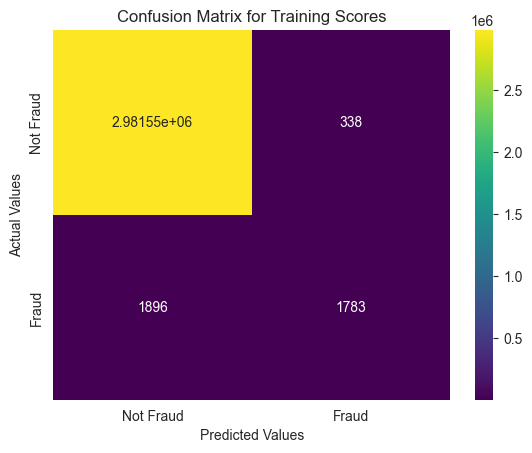

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.46      0.58      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.73      0.79   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036805     163]
 [    663     563]]
[0.5746421267893661, 0.5726013340174448, 0.5746536685479733, 0.576844262295082]


In [132]:
split = list(range(2, 6, 1))
f1_score_split = []
for n in split:
    f1_agg = predict_dt_model(DecisionTreeClassifier(max_depth=9, min_samples_split=n), X_train_scaled, y_train, X_test_scaled, y_test)
    f1_score_split.append(f1_agg)
    print(f1_score_split)

----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=60)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2981890
           1       0.82      0.43      0.56      3679

    accuracy                           1.00   2985569
   macro avg       0.91      0.71      0.78   2985569
weighted avg       1.00      1.00      1.00   2985569

-----------------------------------------------------


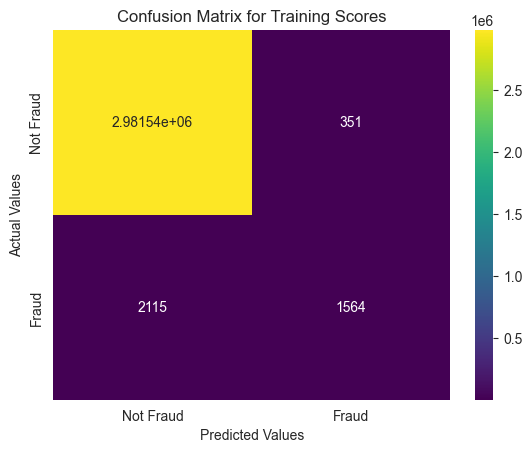

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.41      0.54      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.70      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036825     143]
 [    724     502]]
[0.5366114377338321]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=65)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support


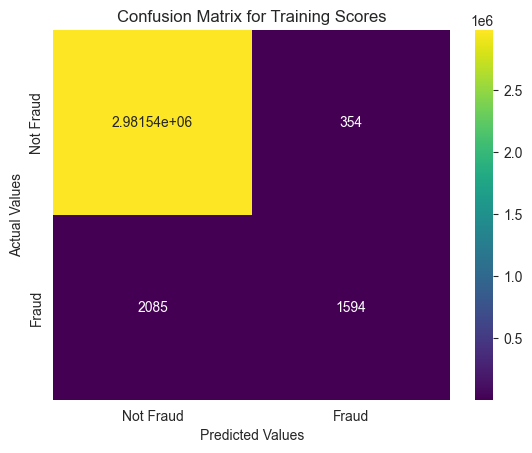

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.42      0.54      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036822     146]
 [    713     513]]
[0.5366114377338321, 0.5442970822281167]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=70)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall 

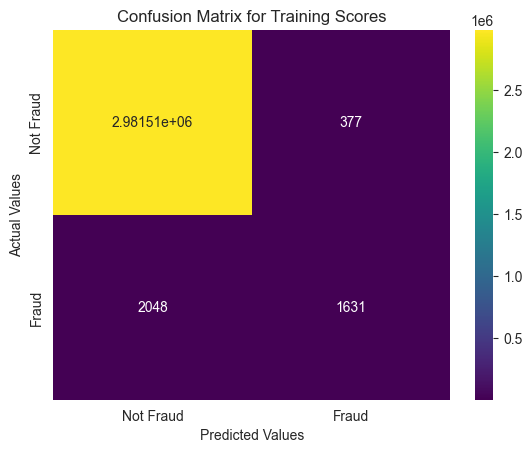

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.43      0.55      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036813     155]
 [    703     523]]
[0.5366114377338321, 0.5442970822281167, 0.5493697478991597]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=75)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              

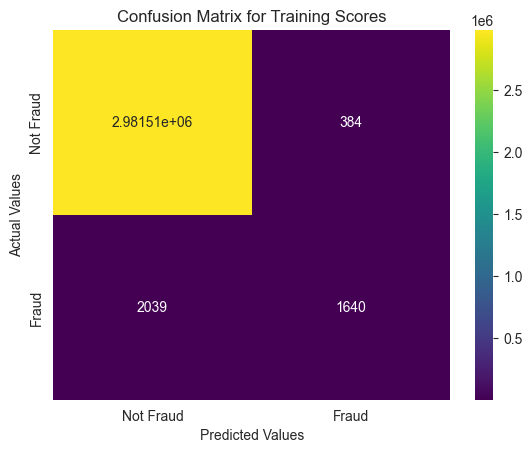

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.43      0.55      1226

    accuracy                           1.00   1038194
   macro avg       0.88      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036808     160]
 [    702     524]]
[0.5366114377338321, 0.5442970822281167, 0.5493697478991597, 0.5486910994764398]


In [133]:
leaf = list(range(60, 80, 5))
f1_score_leaf = []
for n in leaf:
    f1_agg = predict_dt_model(DecisionTreeClassifier(max_depth=9, max_leaf_nodes=n), X_train_scaled, y_train, X_test_scaled, y_test)
    f1_score_leaf.append(f1_agg)
    print(f1_score_leaf)

----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=60)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2981890
           1       0.82      0.43      0.56      3679

    accuracy                           1.00   2985569
   macro avg       0.91      0.71      0.78   2985569
weighted avg       1.00      1.00      1.00   2985569

-----------------------------------------------------


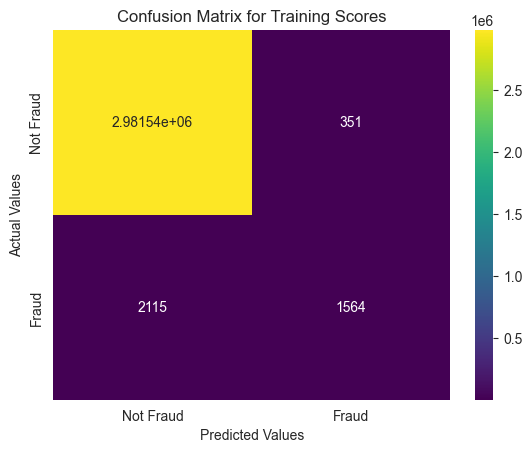

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.41      0.54      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.70      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036825     143]
 [    724     502]]
[0.5366114377338321]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=65)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support


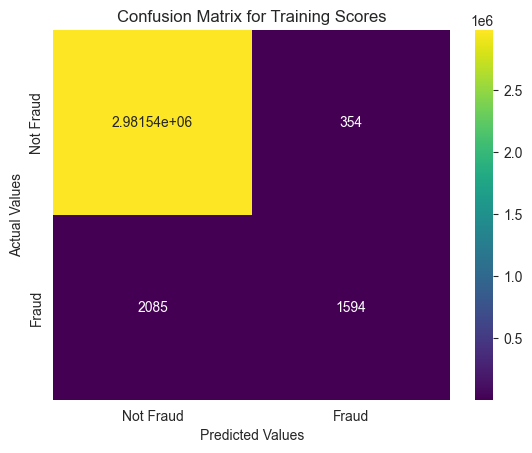

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.78      0.42      0.54      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036822     146]
 [    713     513]]
[0.5366114377338321, 0.5442970822281167]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=70)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall 

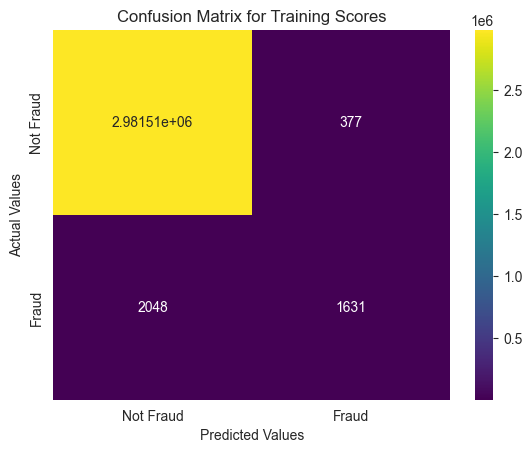

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.43      0.55      1226

    accuracy                           1.00   1038194
   macro avg       0.89      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036813     155]
 [    703     523]]
[0.5366114377338321, 0.5442970822281167, 0.5493697478991597]
----------------------------------------------------------------------------------------------------
FOR DecisionTreeClassifier(max_depth=9, max_leaf_nodes=75)
----------------------------------------------------------------------------------------------------
-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              

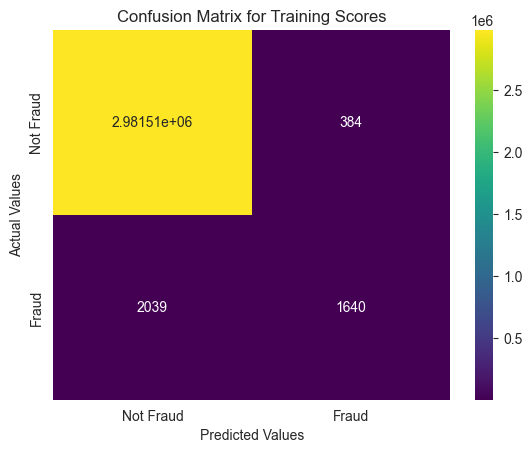

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1036968
           1       0.77      0.43      0.55      1226

    accuracy                           1.00   1038194
   macro avg       0.88      0.71      0.77   1038194
weighted avg       1.00      1.00      1.00   1038194

-----------------------------------------------------
[[1036808     160]
 [    702     524]]
[0.5366114377338321, 0.5442970822281167, 0.5493697478991597, 0.5486910994764398]


In [134]:
leaf = list(range(60, 80, 5))
f1_score_leaf = []
for n in leaf:
    f1_agg = predict_dt_model(DecisionTreeClassifier(max_depth=9, max_leaf_nodes=n), X_train_scaled, y_train, X_test_scaled, y_test)
    f1_score_leaf.append(f1_agg)
    print(f1_score_leaf)

No Skill: ROC AUC=0.500
XGB Model: ROC AUC=0.992


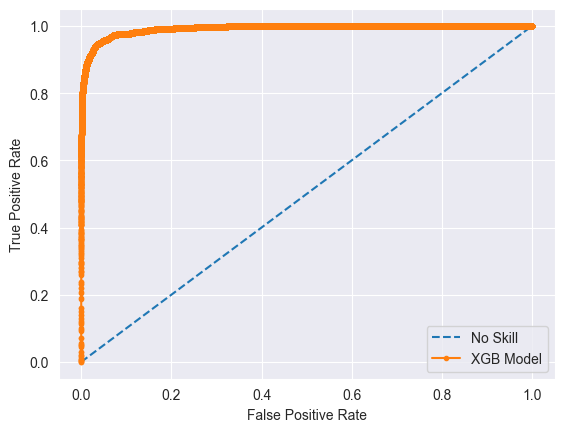

In [135]:
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
def plot_roc_curves(model, trainX, trainy, testX, testy):
    model.fit(trainX, trainy)
    ns_probs = [0 for _ in range(len(testy))]
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('XGB Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

model = XGBClassifier(max_depth=10, n_jobs=-1)
plot_roc_curves(model, X_train_scaled, y_train, X_test_scaled, y_test)